In [1]:
import os, time, gc
import pandas as pd, numpy as np
from tqdm import tqdm

In [2]:
os.listdir('input')

['sample_submission_V2.csv', 'test_V2.csv', 'train_V2.csv']

In [3]:
%%time
tr = pd.read_csv("input/train_V2.csv")
te = pd.read_csv("input/test_V2.csv")

Wall time: 13.1 s


In [4]:
tr.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [5]:
tr.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

In [6]:
tr.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,...,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446965e+06
mean,2.338149e-01,1.106908e+00,1.307171e+02,6.578755e-01,2.268196e-01,1.370147e+00,4.759935e+01,5.050060e+02,9.247833e-01,5.439551e-01,...,1.646590e-01,6.061157e+02,3.496091e-03,4.509322e+00,2.386841e-02,7.918208e-03,1.154218e+03,3.660488e+00,6.064601e+02,4.728216e-01
std,5.885731e-01,1.715794e+00,1.707806e+02,1.145743e+00,6.021553e-01,2.679982e+00,2.746294e+01,6.275049e+02,1.558445e+00,7.109721e-01,...,4.721671e-01,1.498344e+03,7.337297e-02,3.050220e+01,1.673935e-01,9.261157e-02,1.183497e+03,2.456544e+00,7.397004e+02,3.074050e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.551000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,8.424000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.856000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,0.000000e+00,2.000000e+00,1.860000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,...,0.000000e+00,1.909750e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.976000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,2.200000e+01,3.300000e+01,6.616000e+03,5.300000e+01,6.400000e+01,8.000000e+01,1.010000e+02,2.170000e+03,7.200000e+01,2.000000e+01,...,3.900000e+01,4.071000e+04,1.800000e+01,3.823000e+03,1.200000e+01,5.000000e+00,2.578000e+04,2.360000e+02,2.013000e+03,1.000000e+00


In [7]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
Id                 object
groupId            object
matchId            object
assists            int64
boosts             int64
damageDealt        float64
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
longestKill        float64
matchDuration      int64
matchType          object
maxPlace           int64
numGroups          int64
rankPoints         int64
revives            int64
rideDistance       float64
roadKills          int64
swimDistance       float64
teamKills          int64
vehicleDestroys    int64
walkDistance       float64
weaponsAcquired    int64
winPoints          int64
winPlacePerc       float64
dtypes: float64(6), int64(19), object(4)
memory usage: 983.9+ MB


In [8]:
tr.dtypes.value_counts()

int64      19
float64     6
object      4
dtype: int64

In [9]:
tr.select_dtypes(include=['float']).head()

,damageDealt,longestKill,rideDistance,swimDistance,walkDistance,winPlacePerc
0,0.00,0.00,0.0000,0.00,244.80,0.4444
1,91.47,0.00,0.0045,11.04,1434.00,0.6400
2,68.00,0.00,0.0000,0.00,161.80,0.7755
3,32.90,0.00,0.0000,0.00,202.70,0.1667
4,100.00,58.53,0.0000,0.00,49.75,0.1875


In [10]:
tr.select_dtypes(include=['object']).head()

,Id,groupId,matchId,matchType
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,squad-fpp
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,squad-fpp
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,duo
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,squad-fpp
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,solo-fpp


### **Pure Feature Model**

> For Machine Learning promblems, I run the model, like lgb, xgb or catboost with the pure features, in general.

> Before running the machine, let's do some EDA.

## **Plotting**

- Using describe() method, we can see the basic statistics.

- But that's not intuitive I assume.

#### Priority (most correlated with the target value, i.e. the winPlacePerc.)

- damageDealt        
- killPlace          
- killPoints         
- kills              
- killStreaks        
- matchDuration:      Duration of match in seconds.(is is match based or each users?)
- matchType:          Different game type can have different target distribution. -> I can make multiple models for each matchType. I assume this is a reasonable way for predicting more accurate results.
- maxPlace:           if solo type, the number of users in the match(possible max 100). if duo, the possible max(50). i.e. the total group but as description says, this is not match with the numGroups
- rideDistance       
- roadKills
- rideDistance
- roadKills   
- swimDistance
- teamKills   
- vehicleDestroys
- walkDistance   
- weaponsAcquired:    the number of weapons picked up

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Plot few features just for seeing **linearity**

<Figure size 360x360 with 0 Axes>

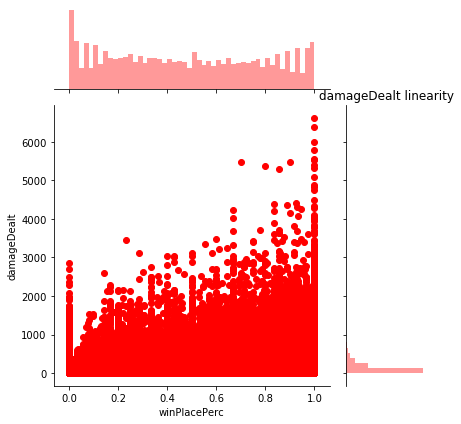

Wall time: 27 s


In [12]:
%%time
plt.figure(figsize=(5,5))
sns.jointplot(x="winPlacePerc", y="damageDealt", data=tr, ratio=3, color="r")
plt.title("damageDealt linearity")
plt.show()

<Figure size 360x360 with 0 Axes>

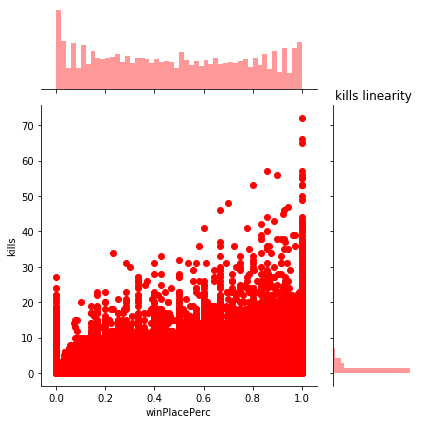

Wall time: 26.9 s


In [13]:
%%time
plt.figure(figsize=(5,5))
sns.jointplot(x="winPlacePerc", y="kills", data=tr, ratio=3, color="r")
plt.title("kills linearity")
plt.show()

> As expected, right skewed distribution

### Plot **all the numeric features** to see the corr with the target

In [14]:
import seaborn as sns
i = 0
features = tr.select_dtypes(exclude=['object']).columns[:-1]
# sns.set_style('whitegrid')
print("num of numeric features: {}".format(len(features)))

num of numeric features: 24


<Figure size 432x288 with 0 Axes>

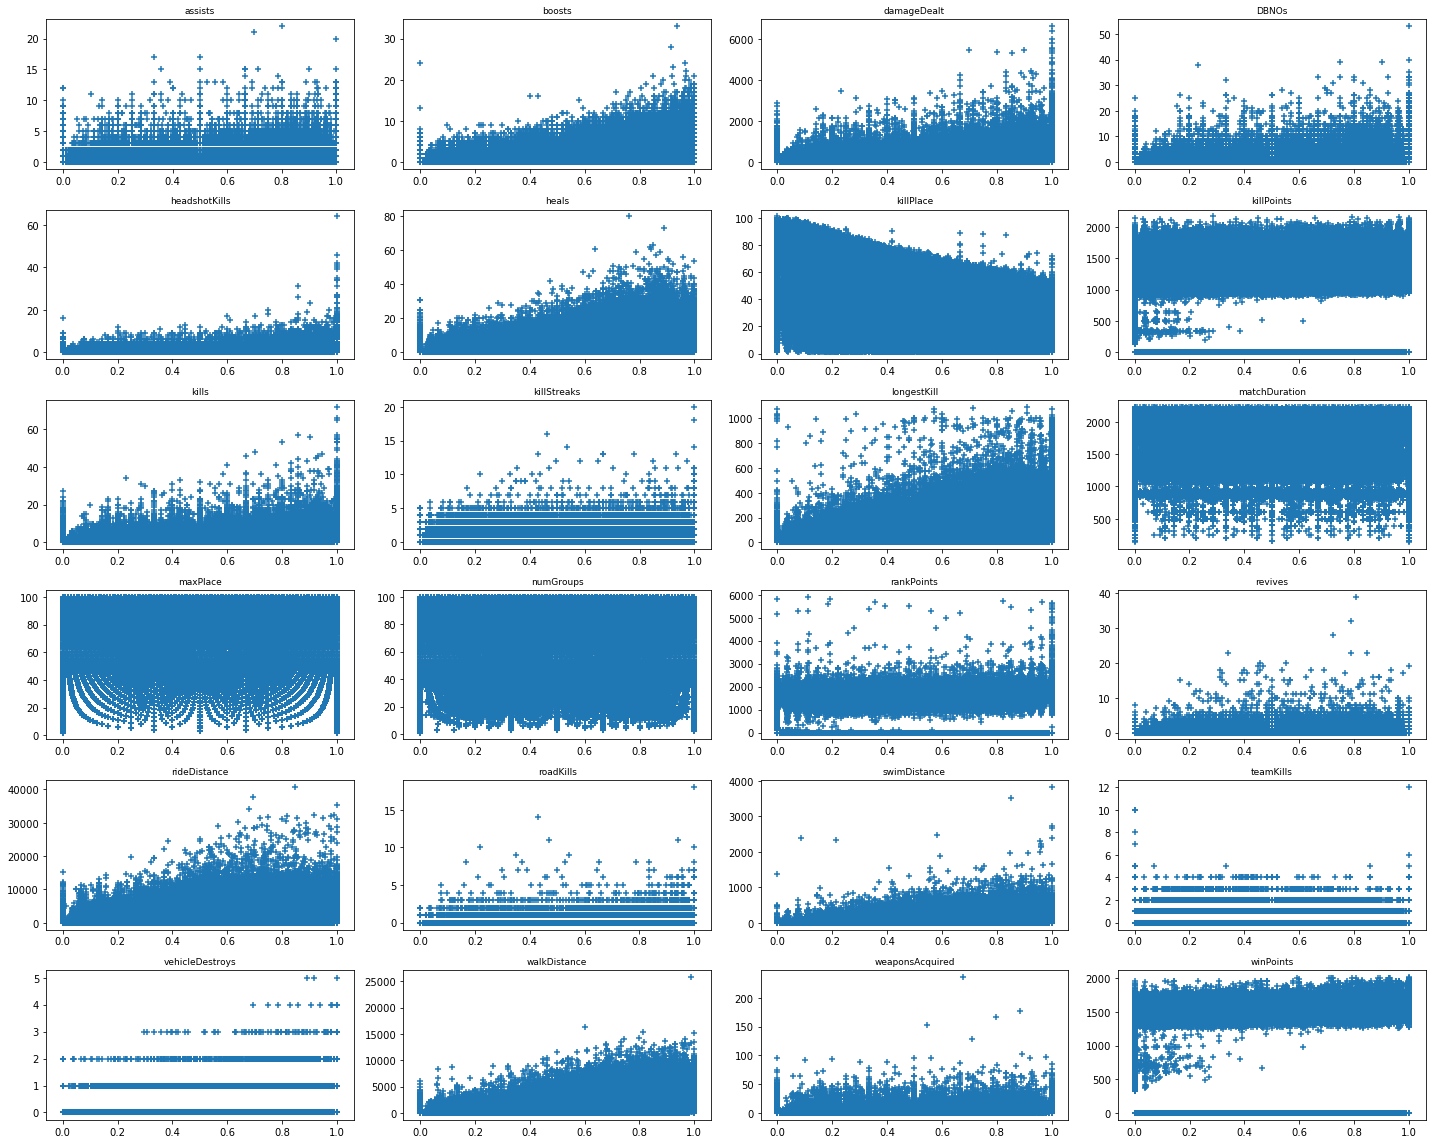

Wall time: 5min 2s


In [15]:
%%time
plt.figure()
fig, ax = plt.subplots(6,4,figsize=(20,16)) #(nrow, ncol)

for feat in features:
    i += 1
    plt.subplot(6,4,i)
    plt.scatter(tr['winPlacePerc'], tr[feat], marker='+')
    #plt.xlabel(feat, fontsize=9)
    #plt.xticks([1,8,15,22,29]) 
    plt.title(feat, fontsize=9)
    plt.tight_layout()

plt.show();

---
#### **From the plots, we can notice below facts.**

#### **1. Checking the outliers**
> headshotkills, damagedealt, kills, killstreaks, longestkill, rankpoints, revives, roadkills, swimdistance, teamkills, walkdistance, weaponsacquired

#### **2. Some linearities**

> boost, damagedealt, DBNOs, headshotkills, heals, killplace, kills, killstreak(?), longestkill, rideDistance, roadkill, swimdistance, vehicledestroys, walkdistance
---

## **Plot all the numeric features by matchType**

In [16]:
tr['matchType'].value_counts()

squad-fpp           1756186
duo-fpp              996691
squad                626526
solo-fpp             536762
duo                  313591
solo                 181943
normal-squad-fpp      17174
crashfpp               6287
normal-duo-fpp         5489
flaretpp               2505
normal-solo-fpp        1682
flarefpp                718
normal-squad            516
crashtpp                371
normal-solo             326
normal-duo              199
Name: matchType, dtype: int64

In [17]:
print("number of matchType: {}".format(tr['matchType'].nunique()))
print("number of features: {}".format(len(features)))

number of matchType: 16
number of features: 24


In [18]:
mt_ls = tr['matchType'].unique()

============================== SQUAD-FPP ==============================



<Figure size 432x288 with 0 Axes>

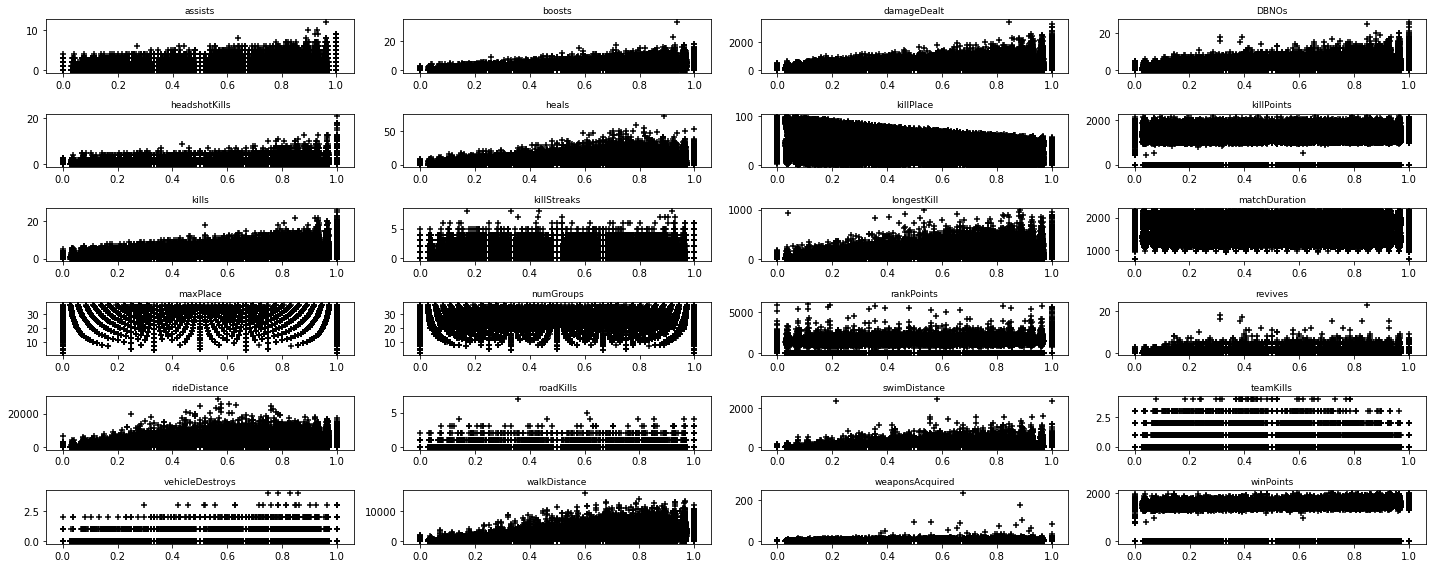

============================== DUO ==============================



<Figure size 432x288 with 0 Axes>

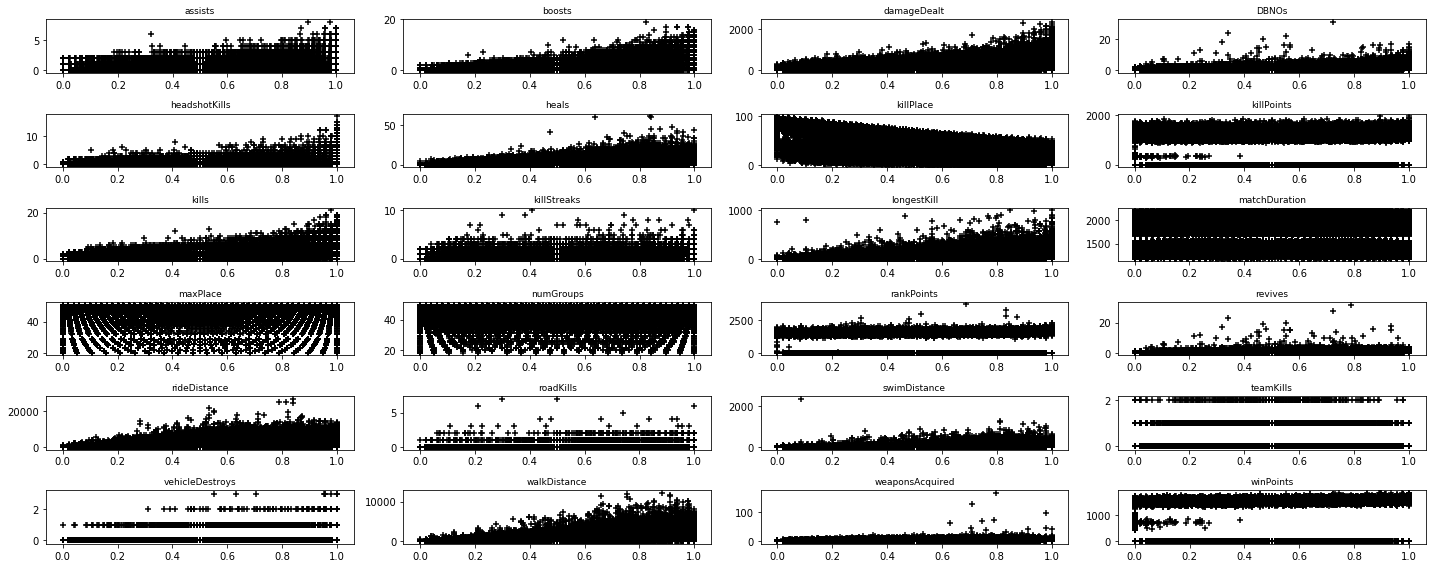

============================== SOLO-FPP ==============================



<Figure size 432x288 with 0 Axes>

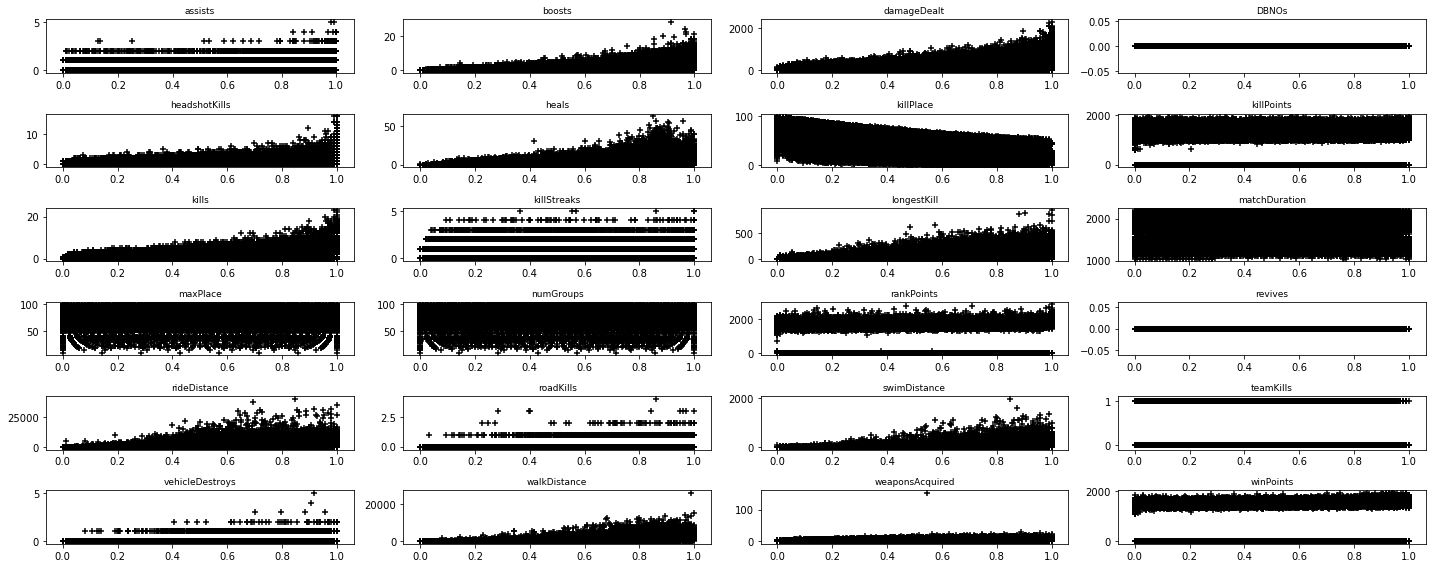

============================== SQUAD ==============================



<Figure size 432x288 with 0 Axes>

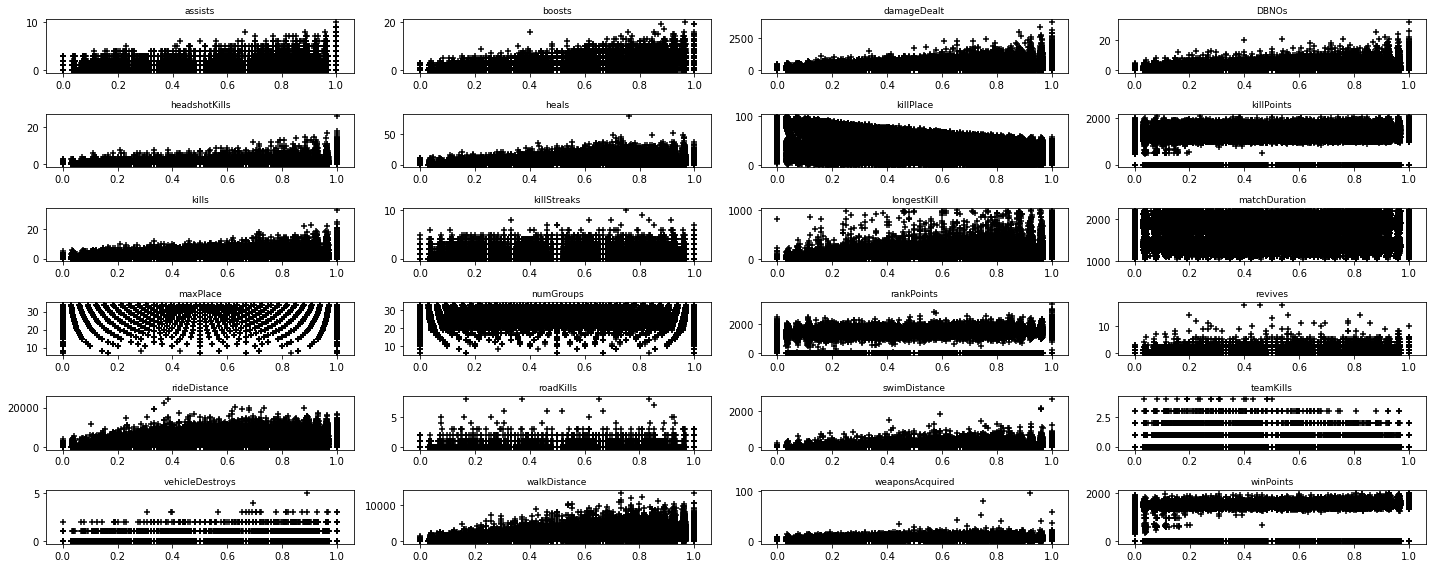

============================== DUO-FPP ==============================



<Figure size 432x288 with 0 Axes>

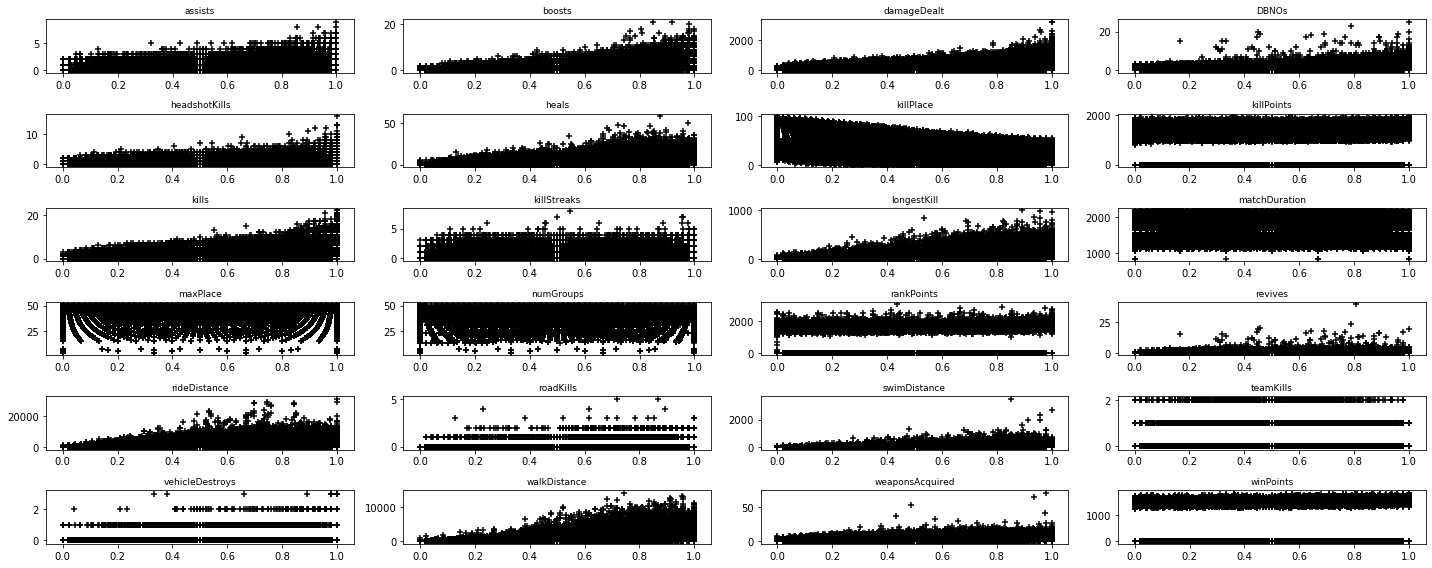

============================== SOLO ==============================



<Figure size 432x288 with 0 Axes>

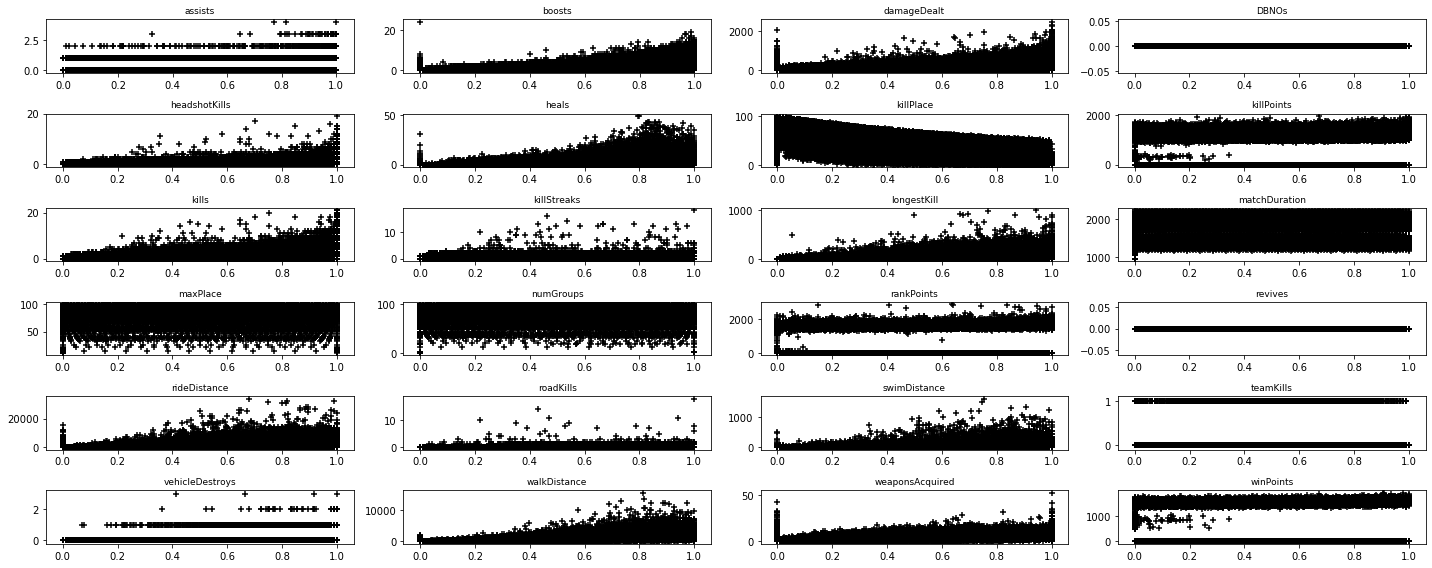

============================== NORMAL-SQUAD-FPP ==============================



<Figure size 432x288 with 0 Axes>

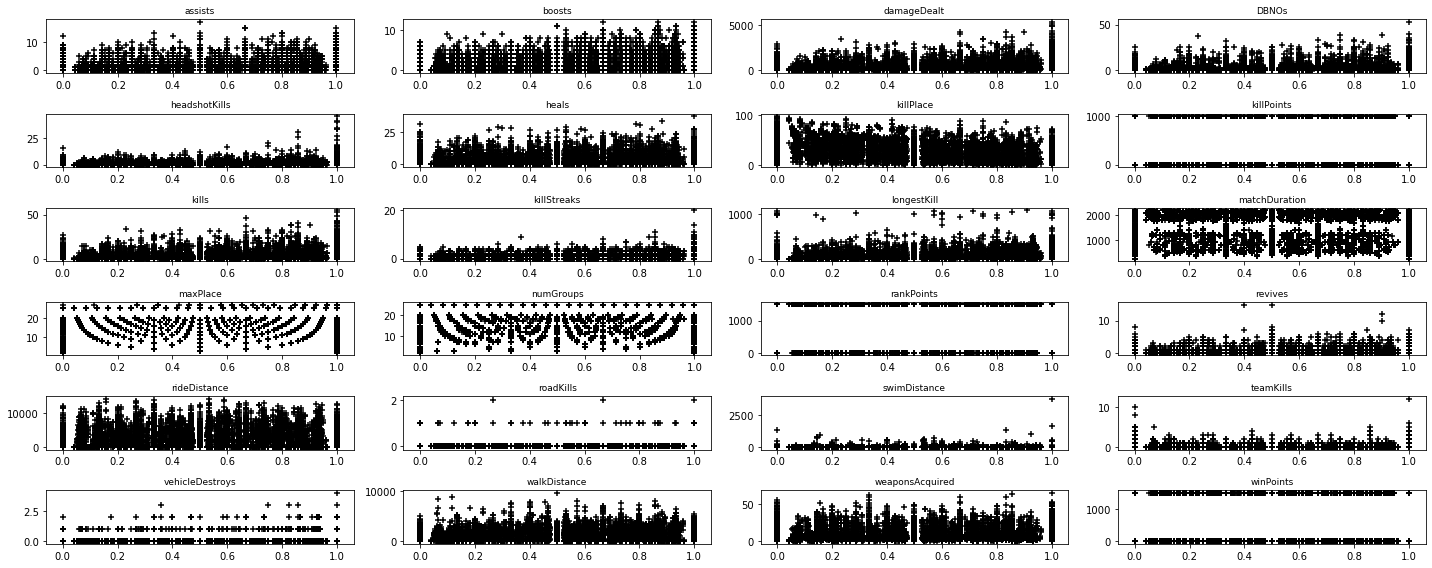

============================== CRASHFPP ==============================



<Figure size 432x288 with 0 Axes>

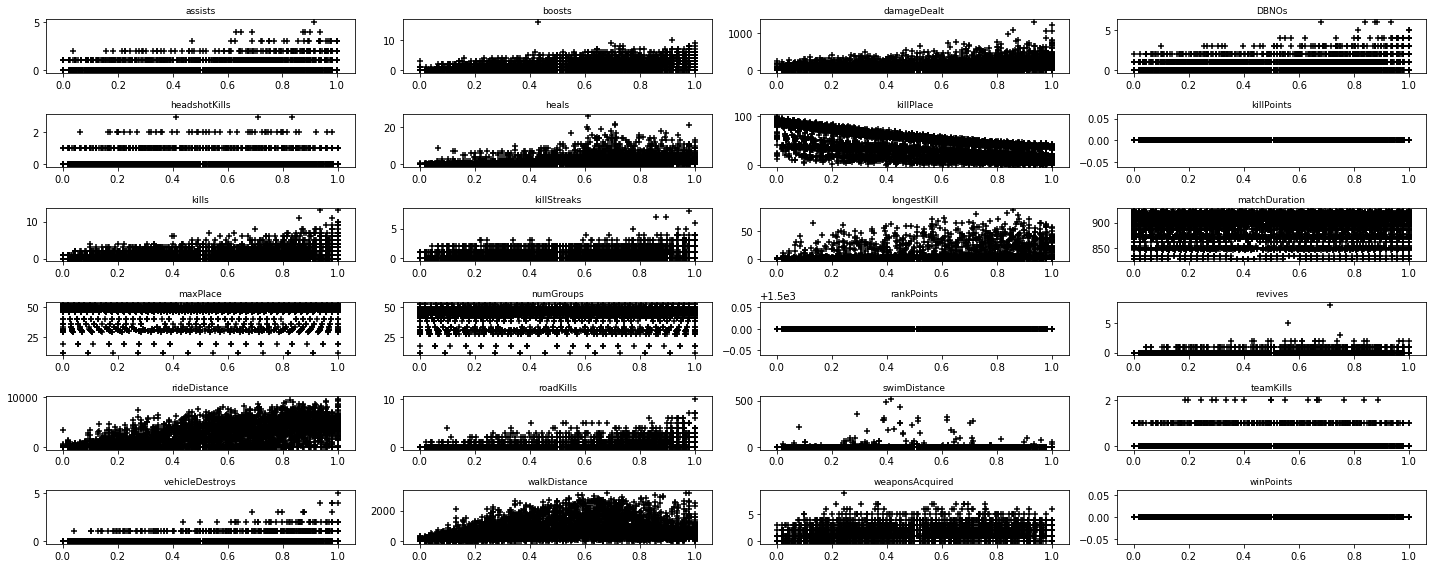

============================== FLARETPP ==============================



<Figure size 432x288 with 0 Axes>

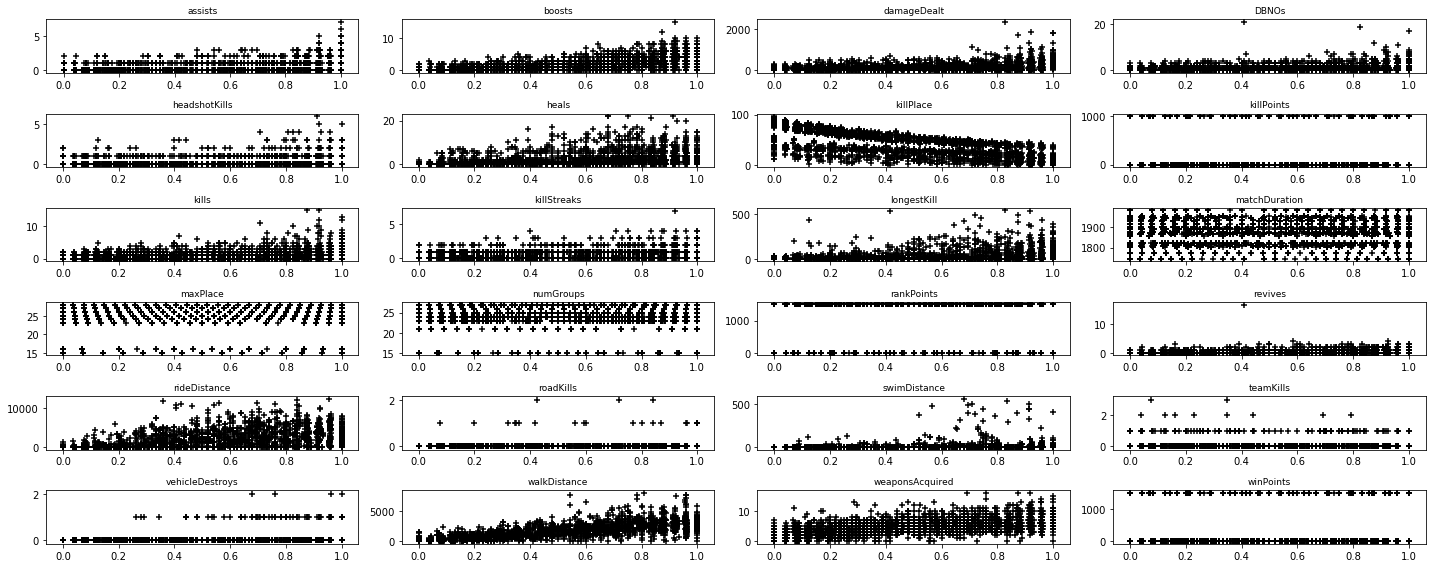

============================== NORMAL-SOLO-FPP ==============================



<Figure size 432x288 with 0 Axes>

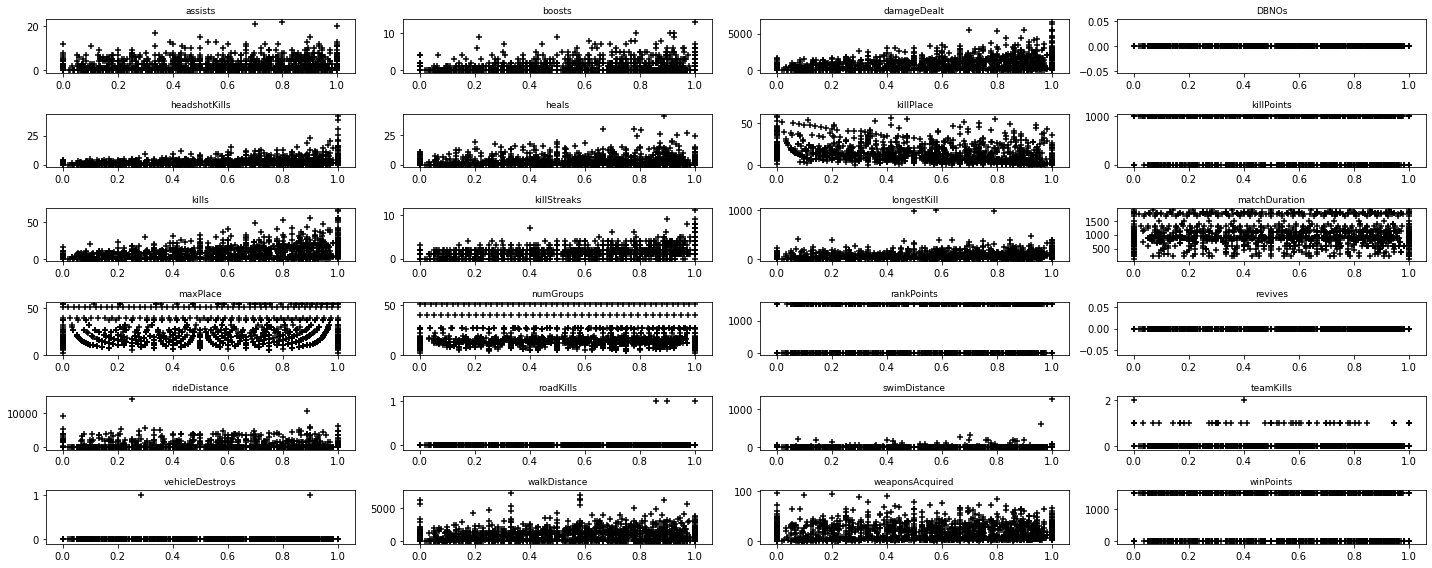

============================== FLAREFPP ==============================



<Figure size 432x288 with 0 Axes>

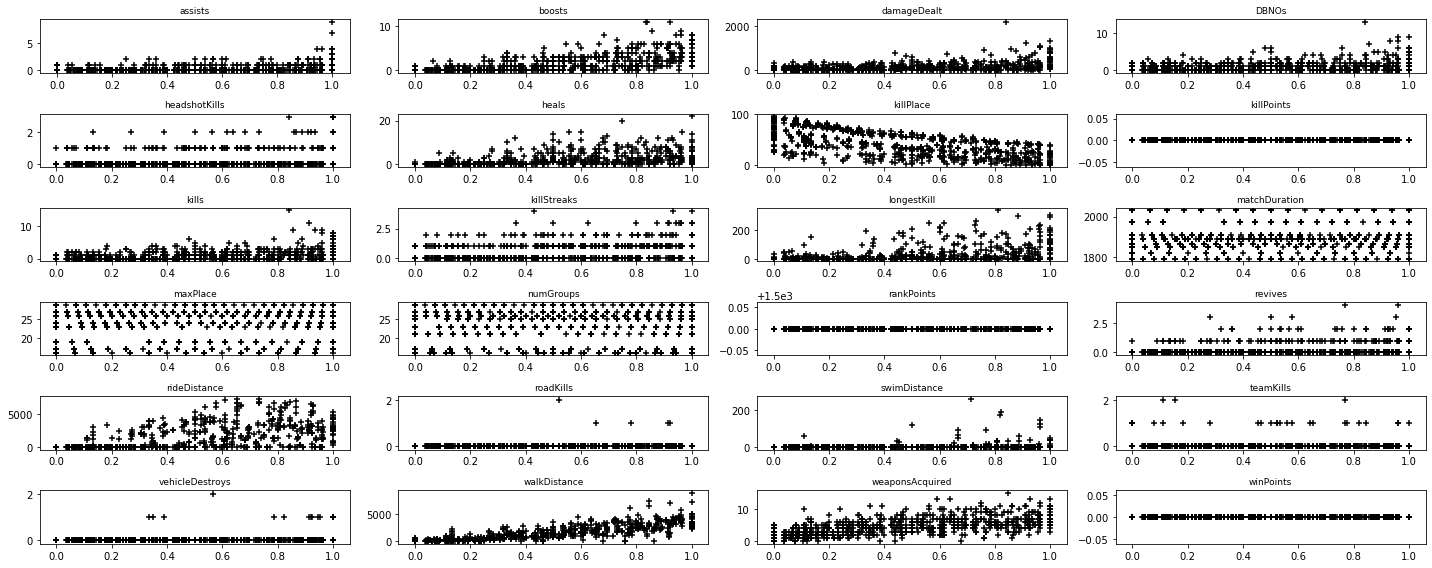

============================== NORMAL-DUO-FPP ==============================



<Figure size 432x288 with 0 Axes>

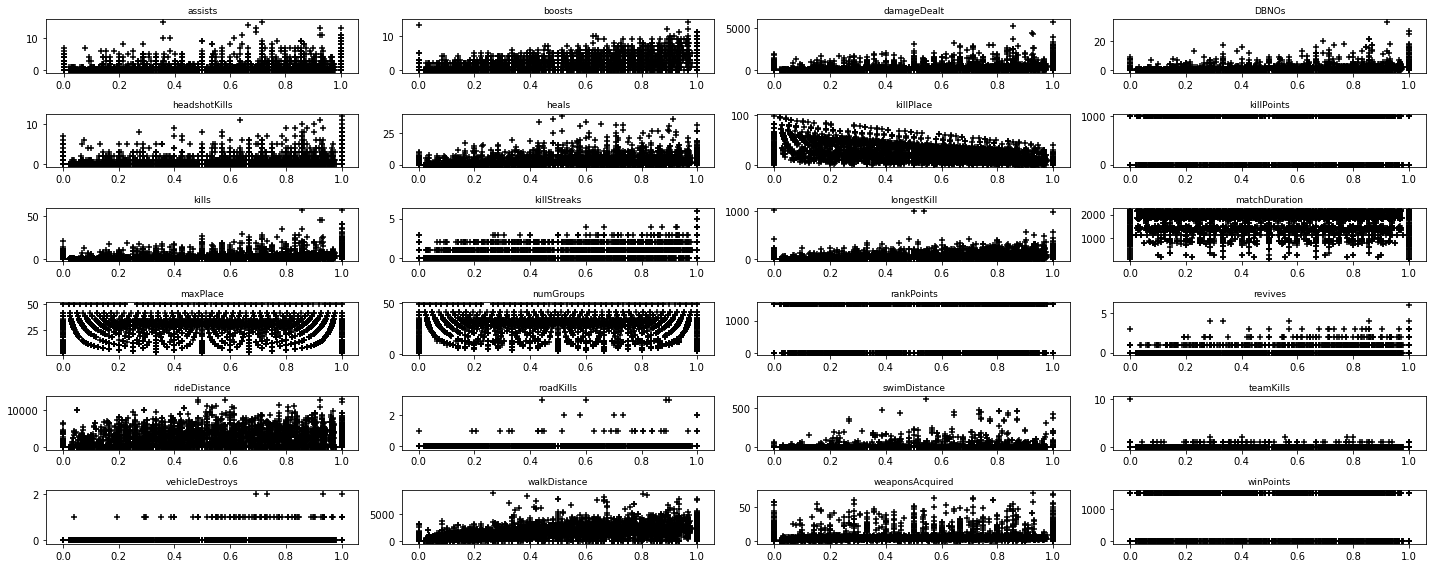

============================== NORMAL-DUO ==============================



<Figure size 432x288 with 0 Axes>

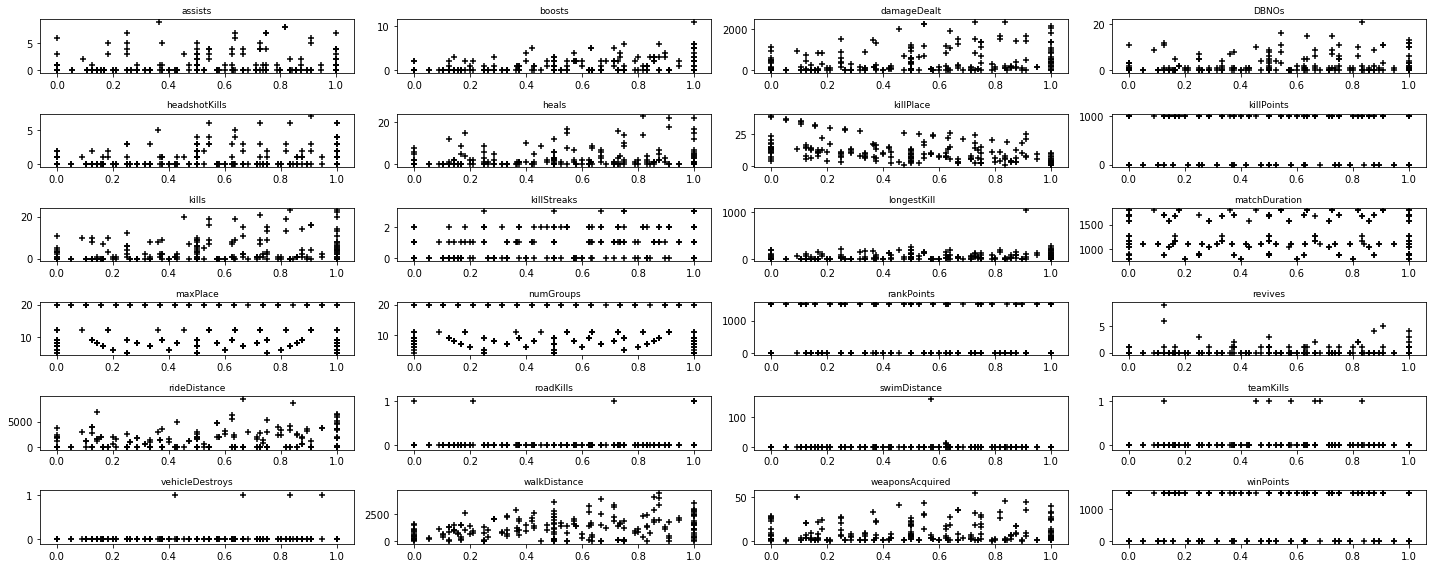

============================== NORMAL-SQUAD ==============================



<Figure size 432x288 with 0 Axes>

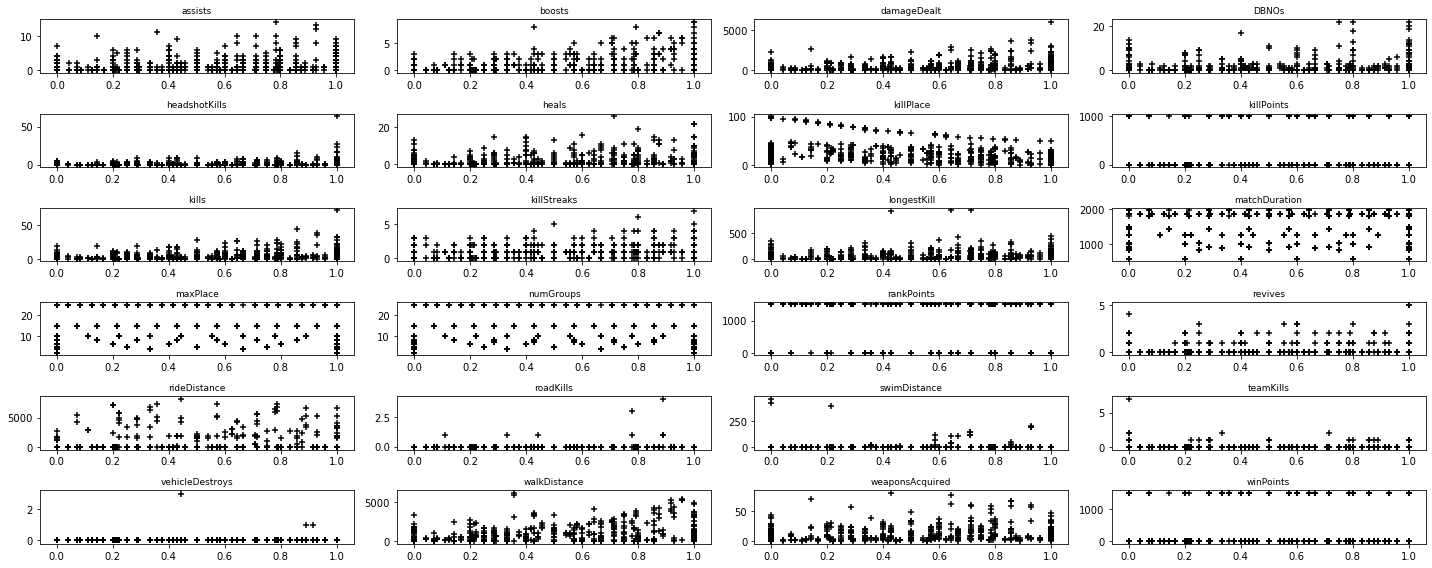

============================== CRASHTPP ==============================



<Figure size 432x288 with 0 Axes>

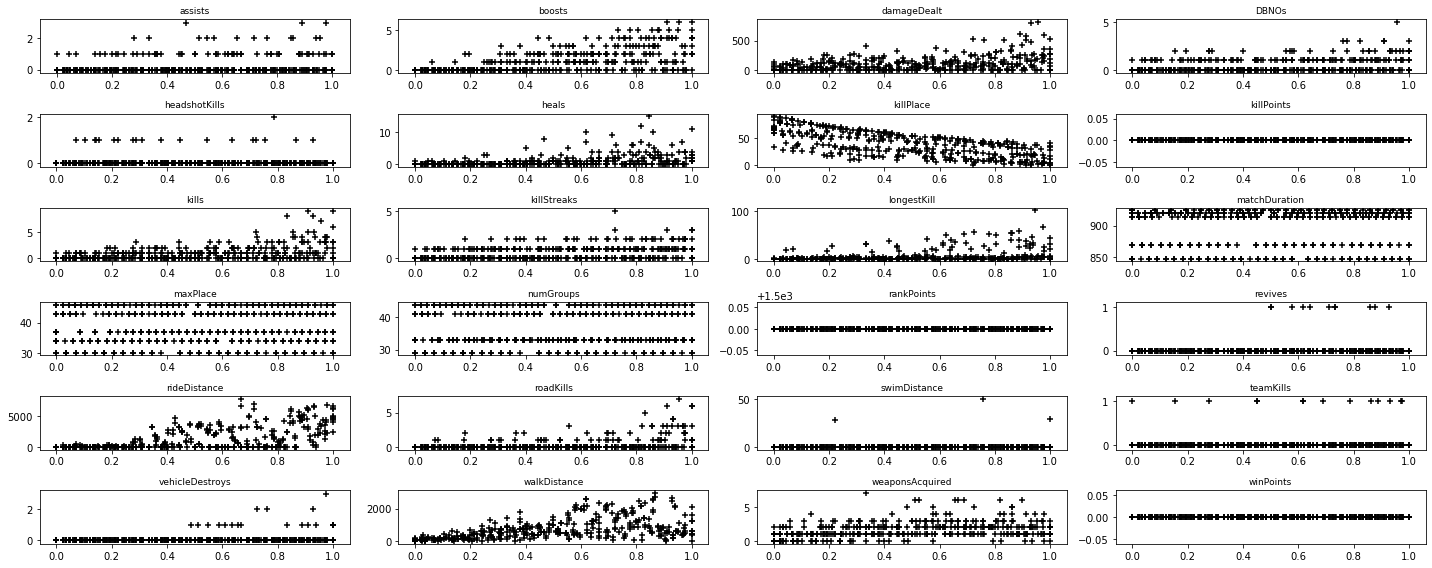

============================== NORMAL-SOLO ==============================



<Figure size 432x288 with 0 Axes>

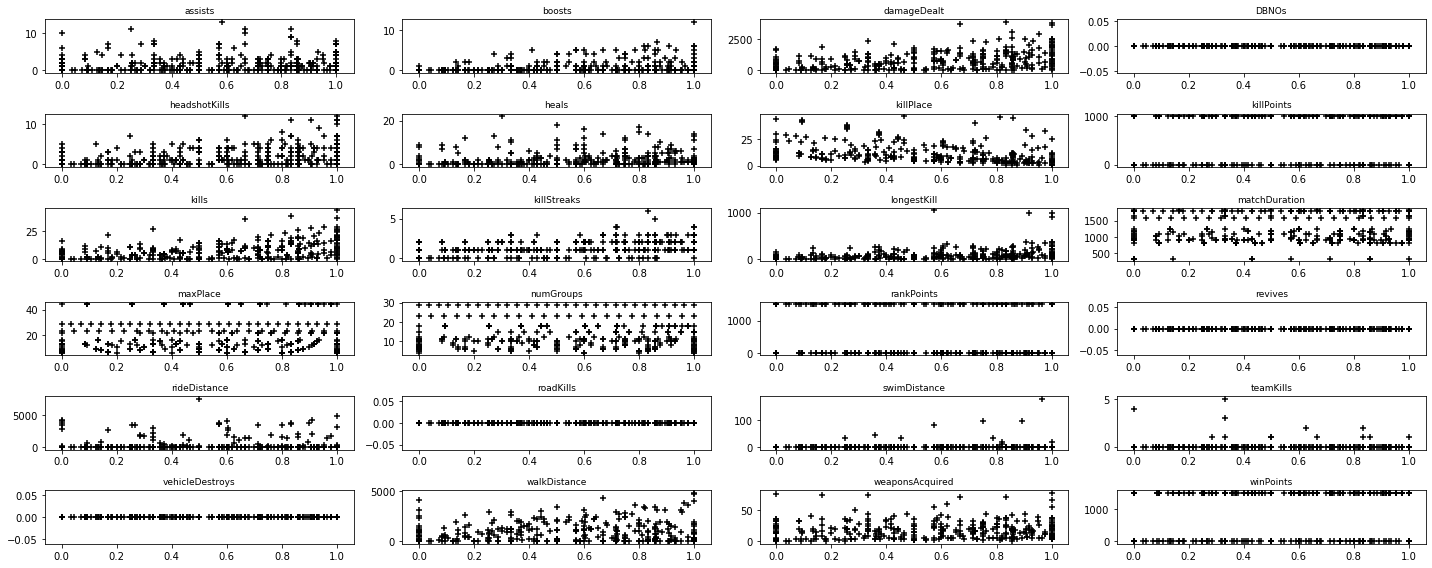

Wall time: 10min 37s


In [19]:
%%time
for mt in mt_ls:
    print("="*30+" {} ".format(mt).upper()+"="*30+"\n")
    plt.figure()
    fig, ax = plt.subplots(6,4,figsize=(20,8)) #(nrow, ncol)

    for i, feat in enumerate(features):
#         i += 1
        plt.subplot(6,4,i+1)
        plt.scatter(tr[tr['matchType']==mt]['winPlacePerc'], tr[tr['matchType']==mt][feat], marker='+', c='black')
        #plt.xlabel(feat, fontsize=9)
        #plt.xticks([1,8,15,22,29]) 
        plt.title(feat, fontsize=9)
        plt.tight_layout()

    plt.show();

In [20]:
mt_ls.sort()
mt_ls

array(['crashfpp', 'crashtpp', 'duo', 'duo-fpp', 'flarefpp', 'flaretpp',
       'normal-duo', 'normal-duo-fpp', 'normal-solo', 'normal-solo-fpp',
       'normal-squad', 'normal-squad-fpp', 'solo', 'solo-fpp', 'squad',
       'squad-fpp'], dtype=object)

## **Compare matchType**

============================================================ ASSISTS ============================================================



<Figure size 432x288 with 0 Axes>

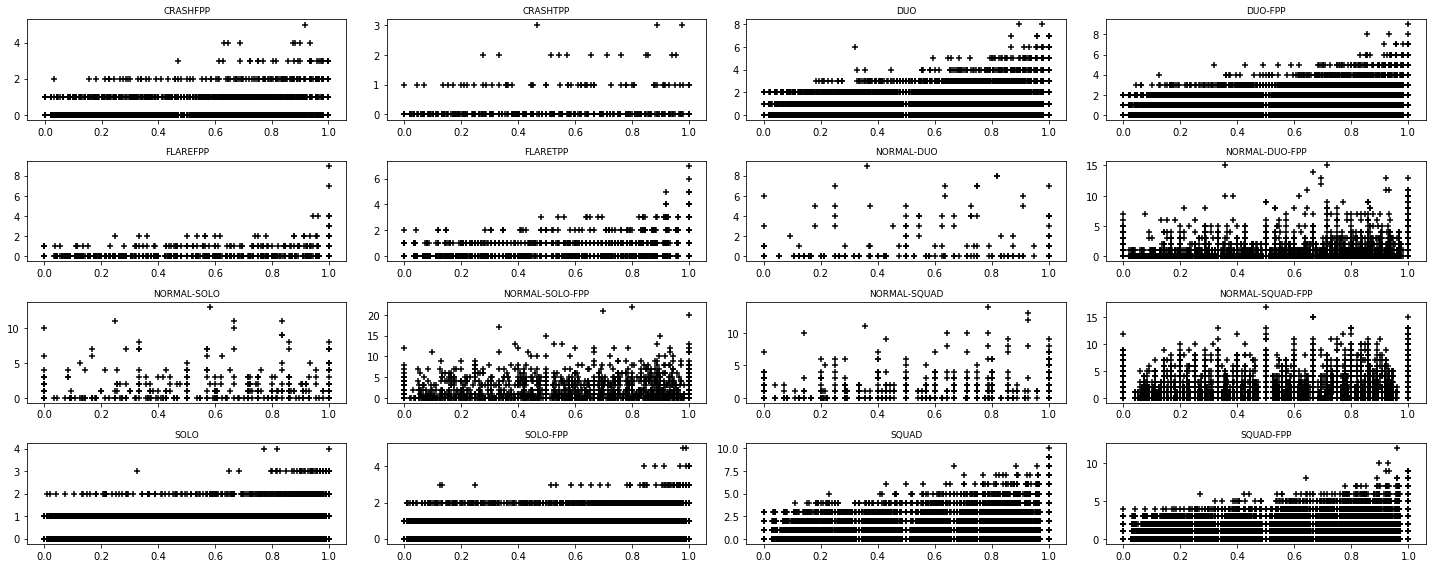

============================================================ BOOSTS ============================================================



<Figure size 432x288 with 0 Axes>

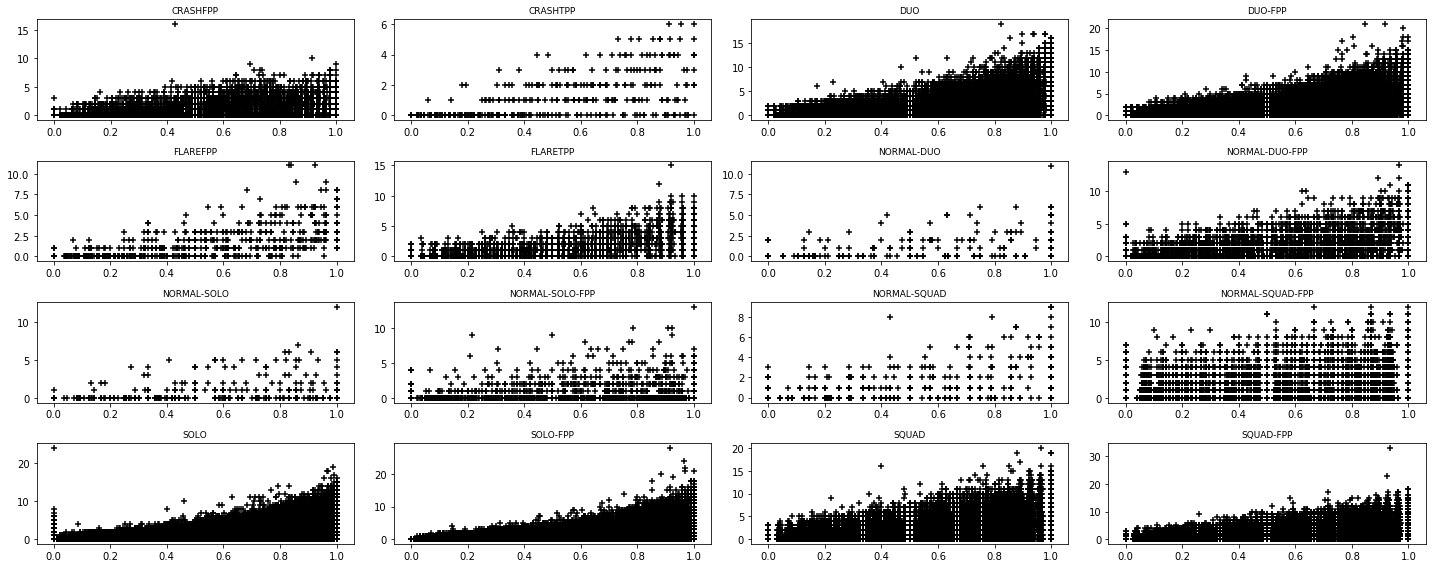

============================================================ DAMAGEDEALT ============================================================



<Figure size 432x288 with 0 Axes>

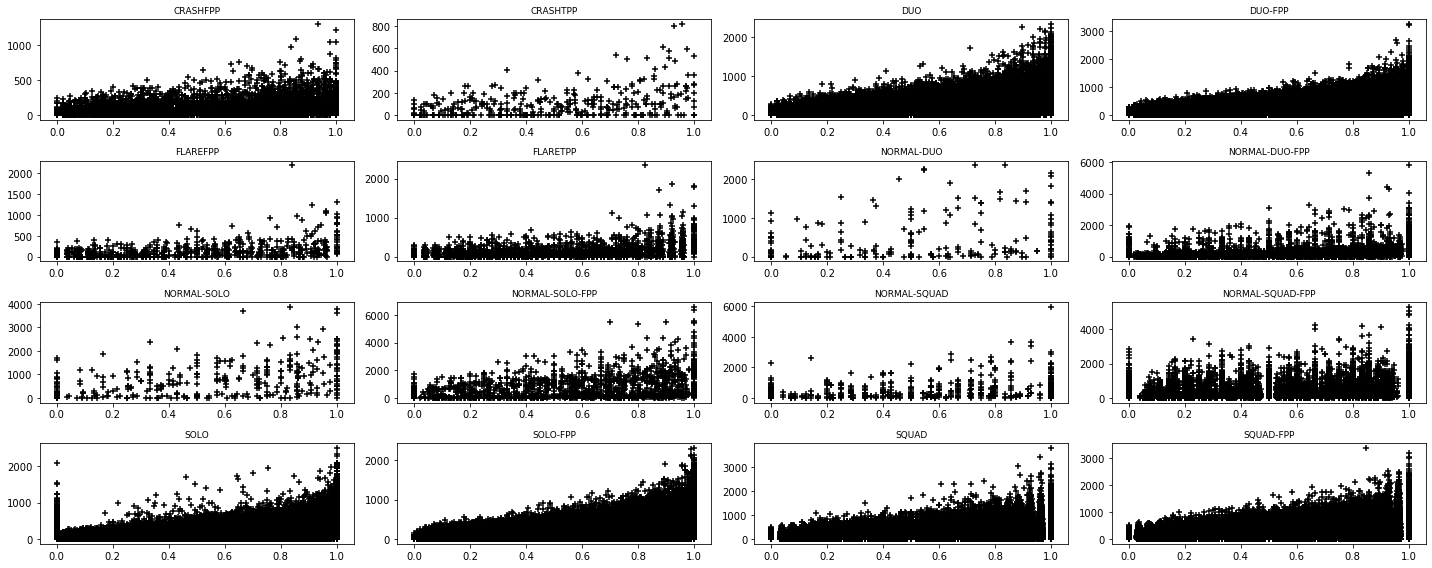

============================================================ DBNOS ============================================================



<Figure size 432x288 with 0 Axes>

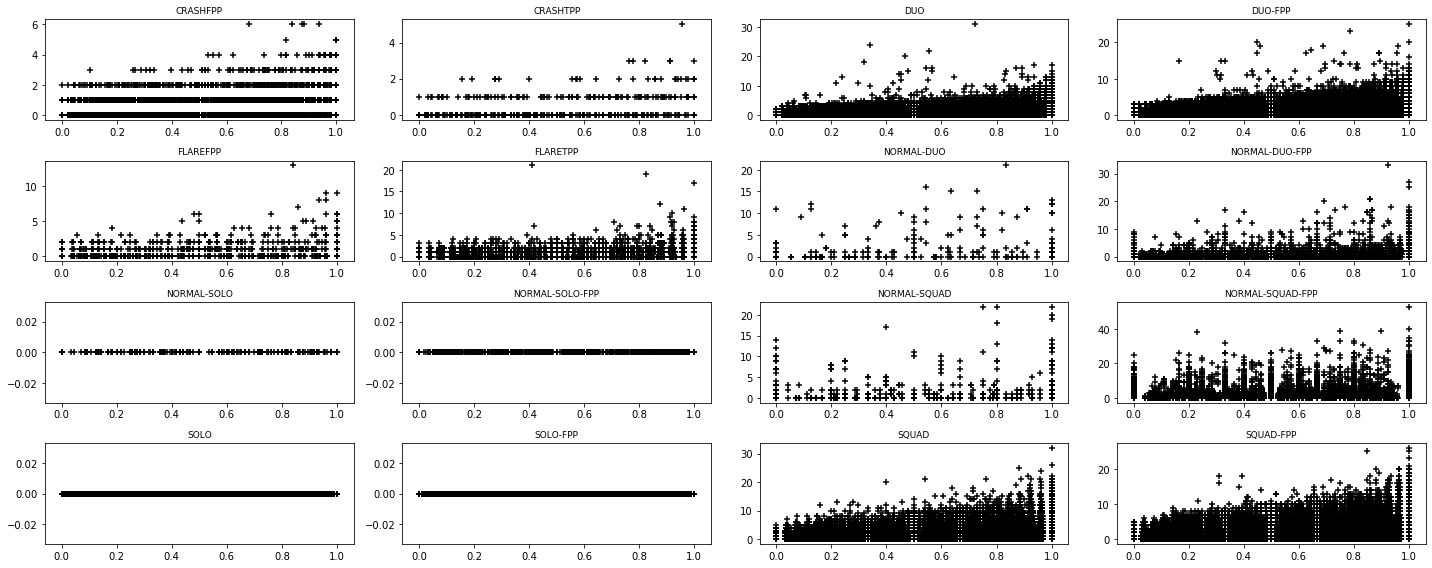

============================================================ HEADSHOTKILLS ============================================================



<Figure size 432x288 with 0 Axes>

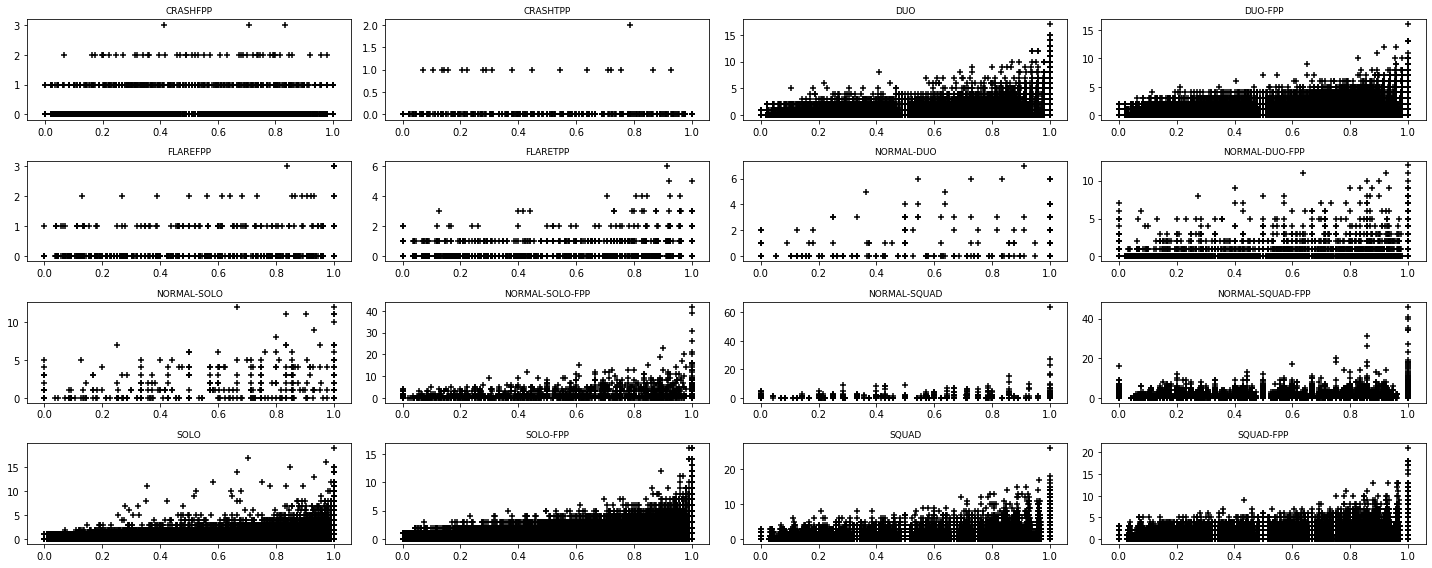

============================================================ HEALS ============================================================



<Figure size 432x288 with 0 Axes>

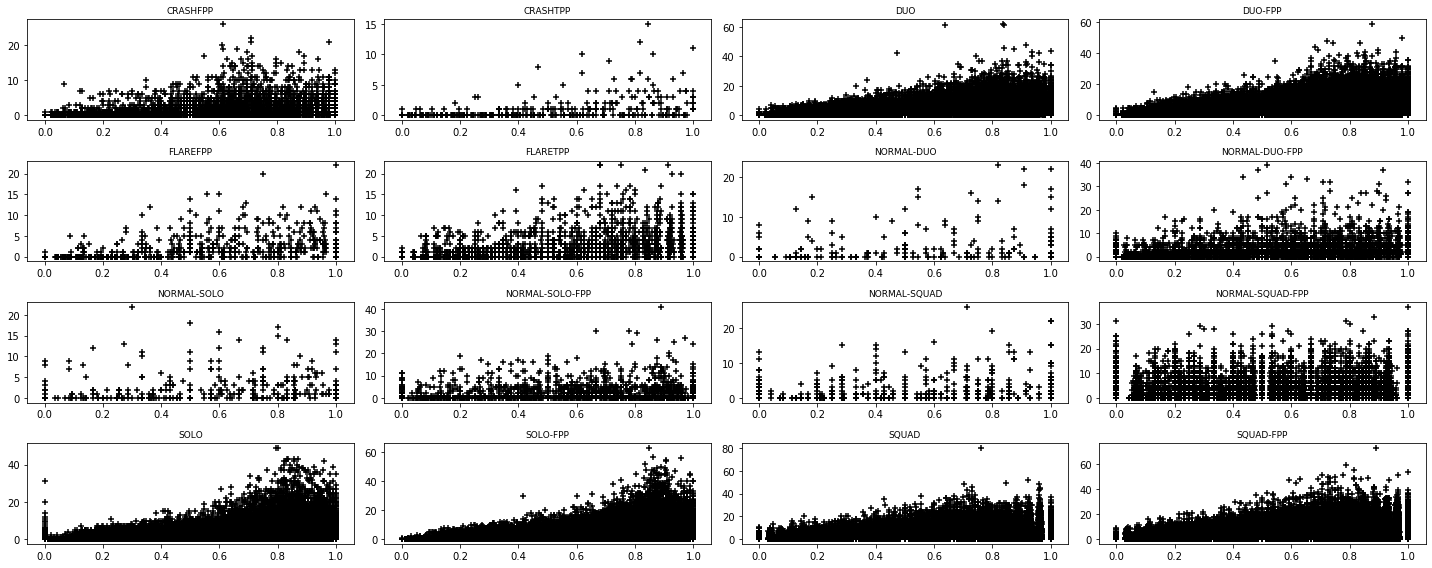

============================================================ KILLPLACE ============================================================



<Figure size 432x288 with 0 Axes>

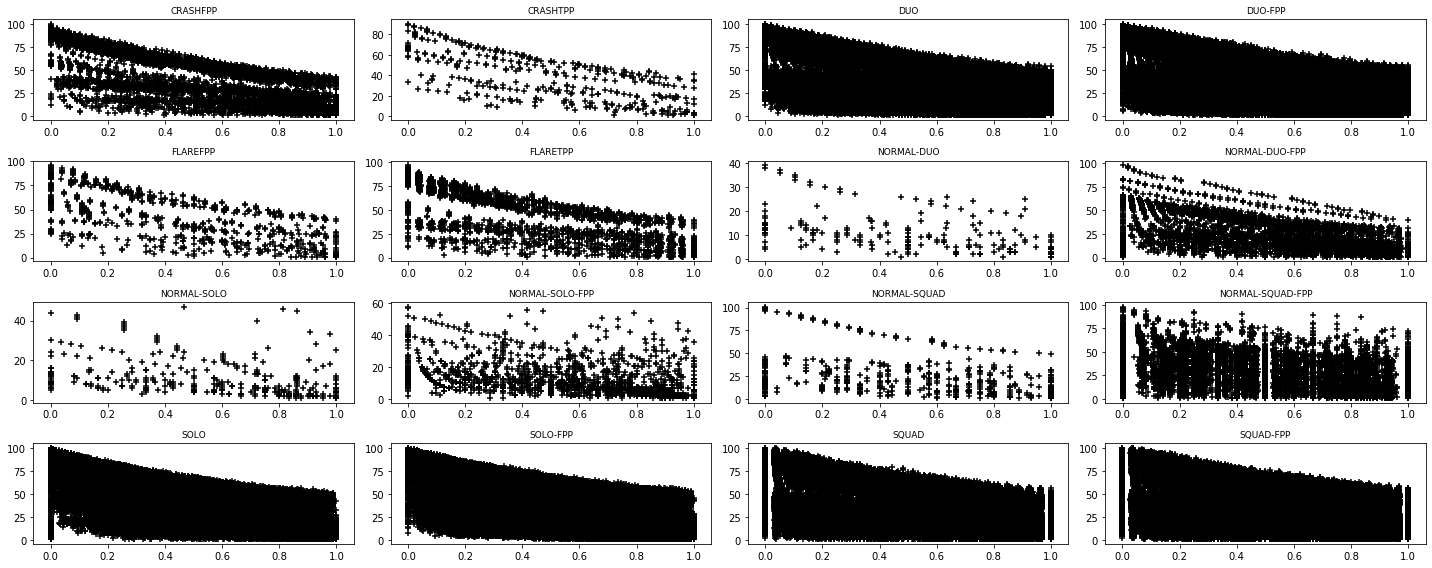

============================================================ KILLPOINTS ============================================================



<Figure size 432x288 with 0 Axes>

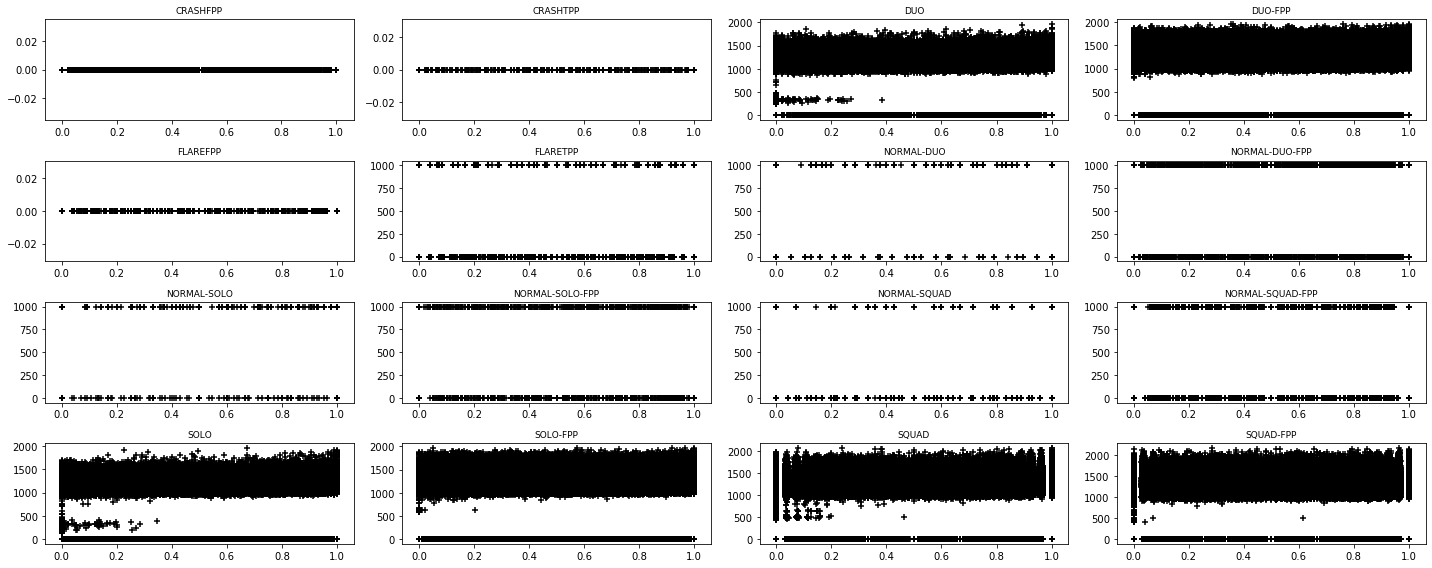

============================================================ KILLS ============================================================



<Figure size 432x288 with 0 Axes>

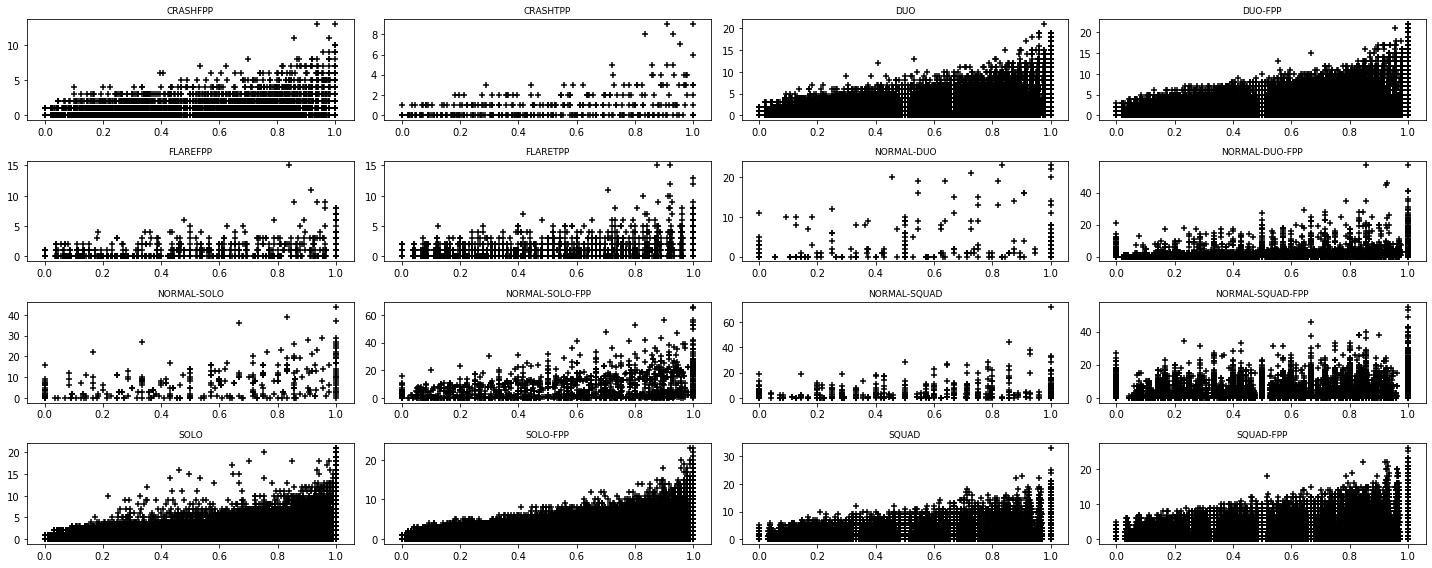

============================================================ KILLSTREAKS ============================================================



<Figure size 432x288 with 0 Axes>

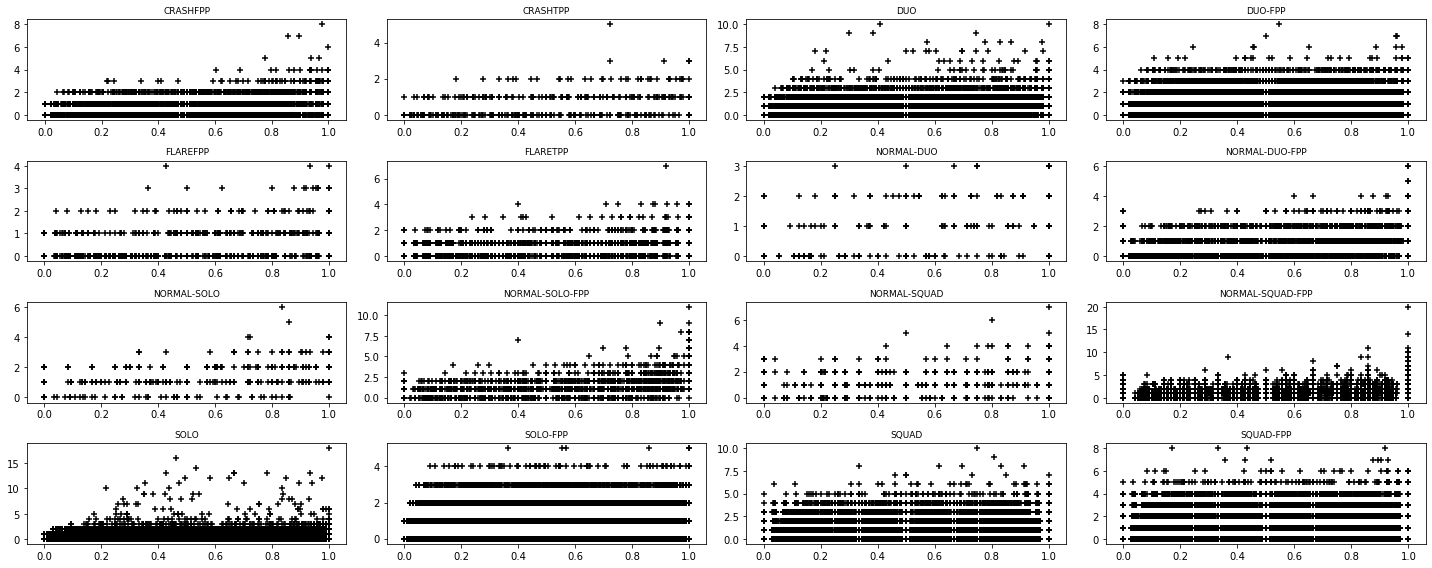

============================================================ LONGESTKILL ============================================================



<Figure size 432x288 with 0 Axes>

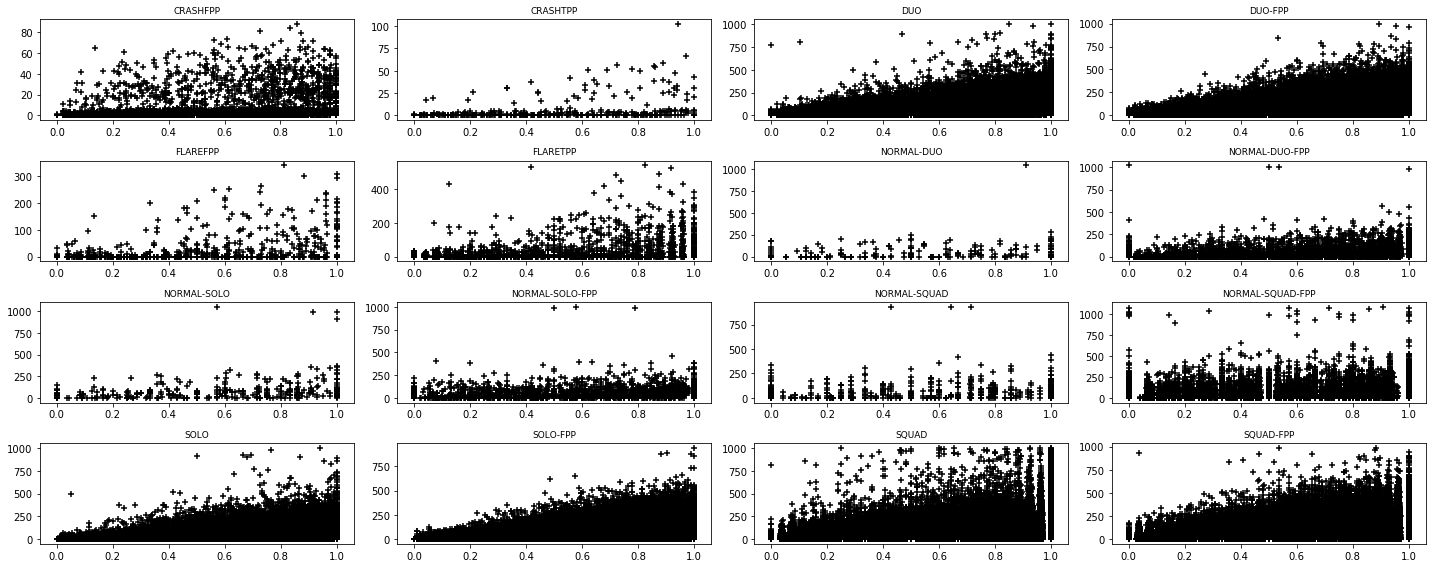

============================================================ MATCHDURATION ============================================================



<Figure size 432x288 with 0 Axes>

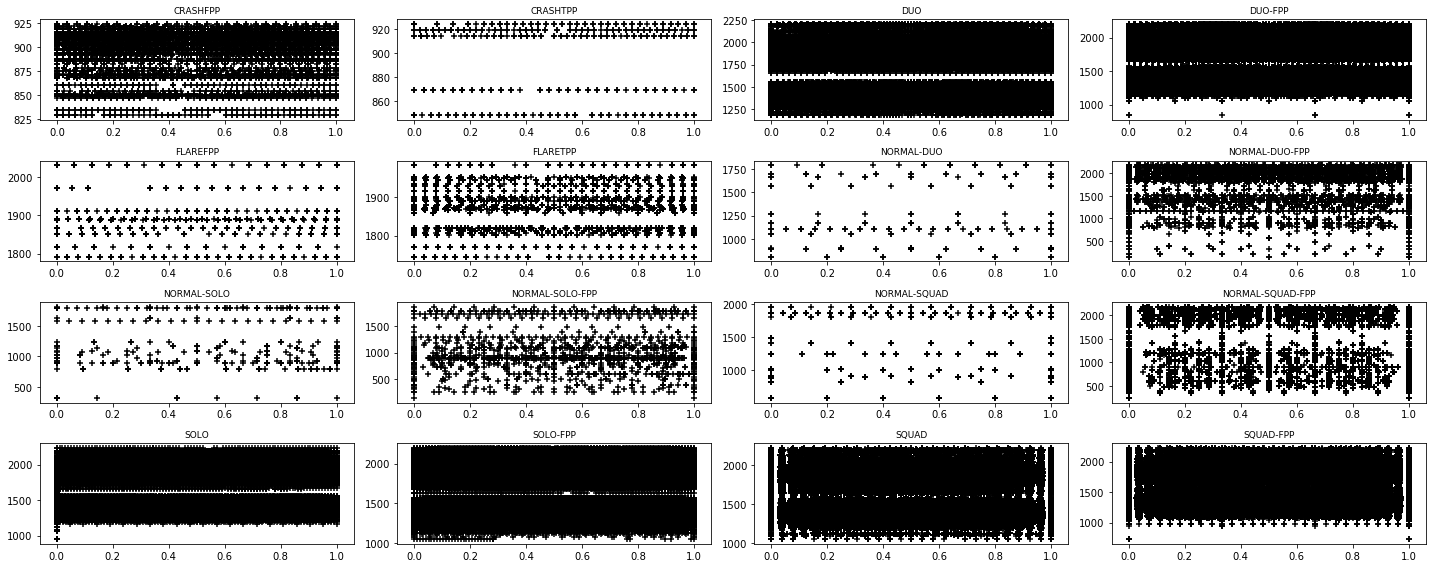

============================================================ MAXPLACE ============================================================



<Figure size 432x288 with 0 Axes>

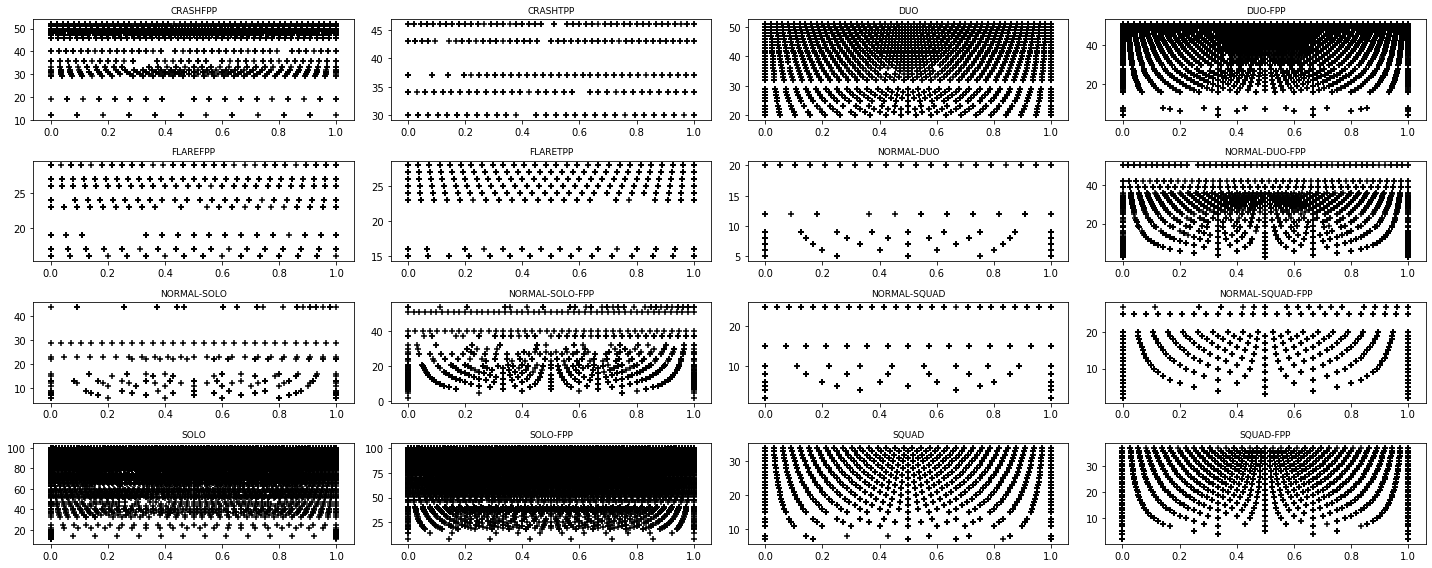

============================================================ NUMGROUPS ============================================================



<Figure size 432x288 with 0 Axes>

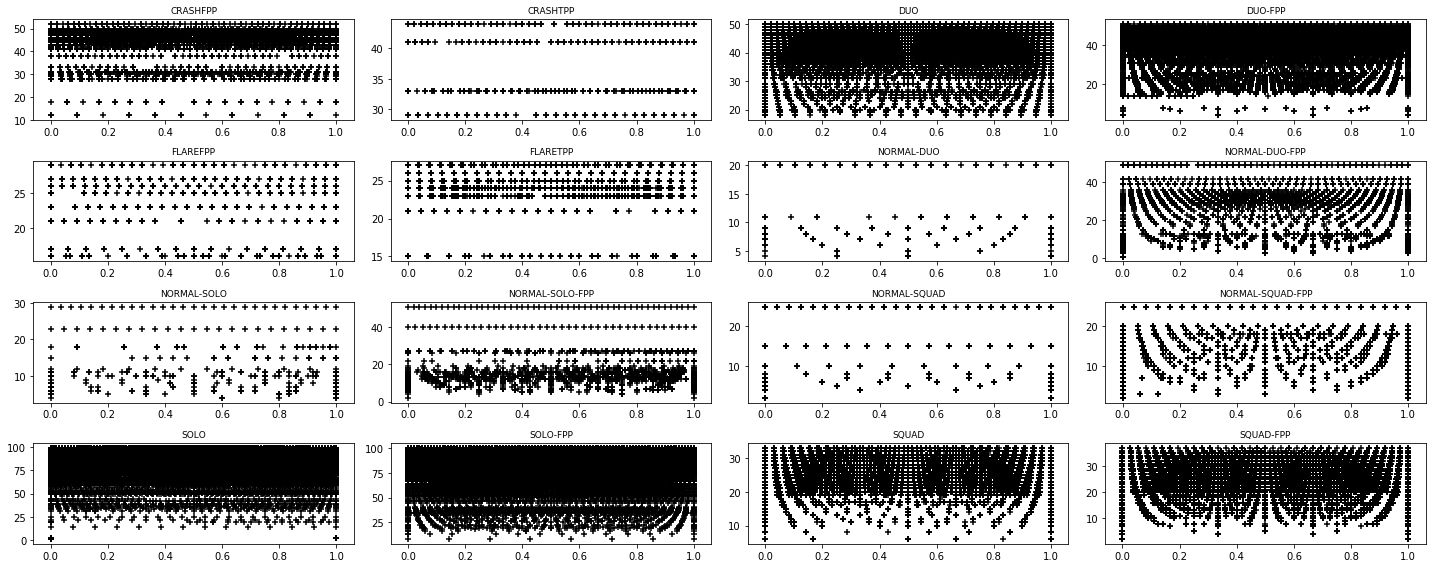

============================================================ RANKPOINTS ============================================================



<Figure size 432x288 with 0 Axes>

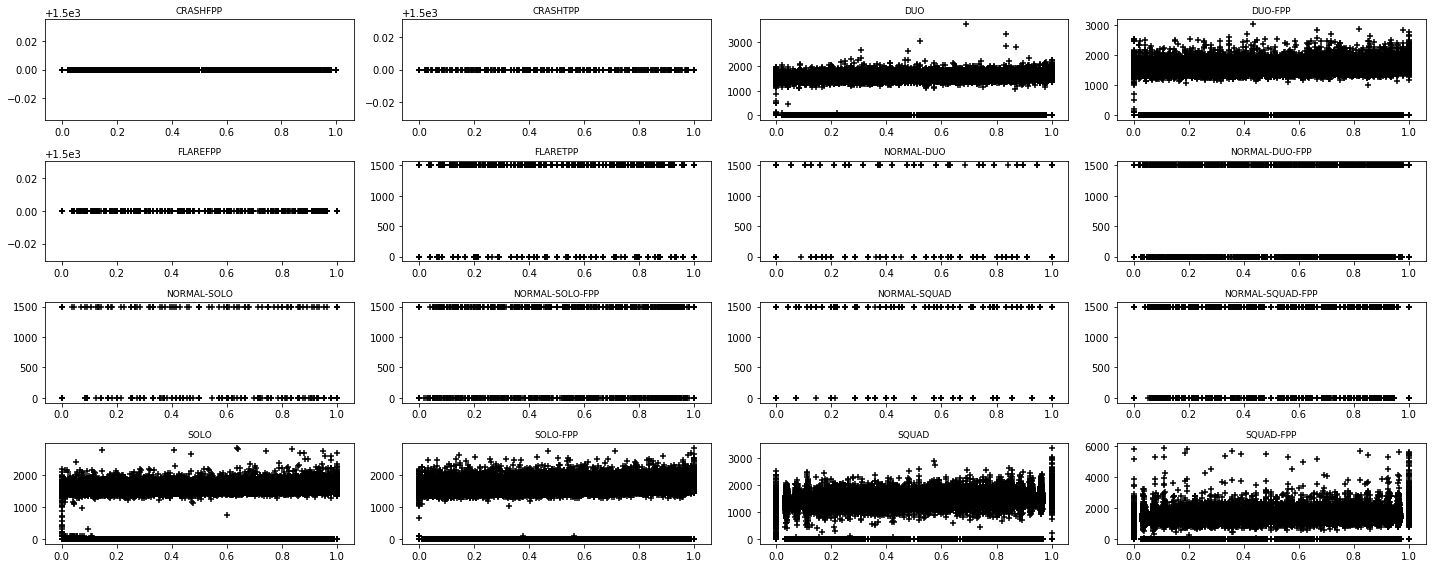

============================================================ REVIVES ============================================================



<Figure size 432x288 with 0 Axes>

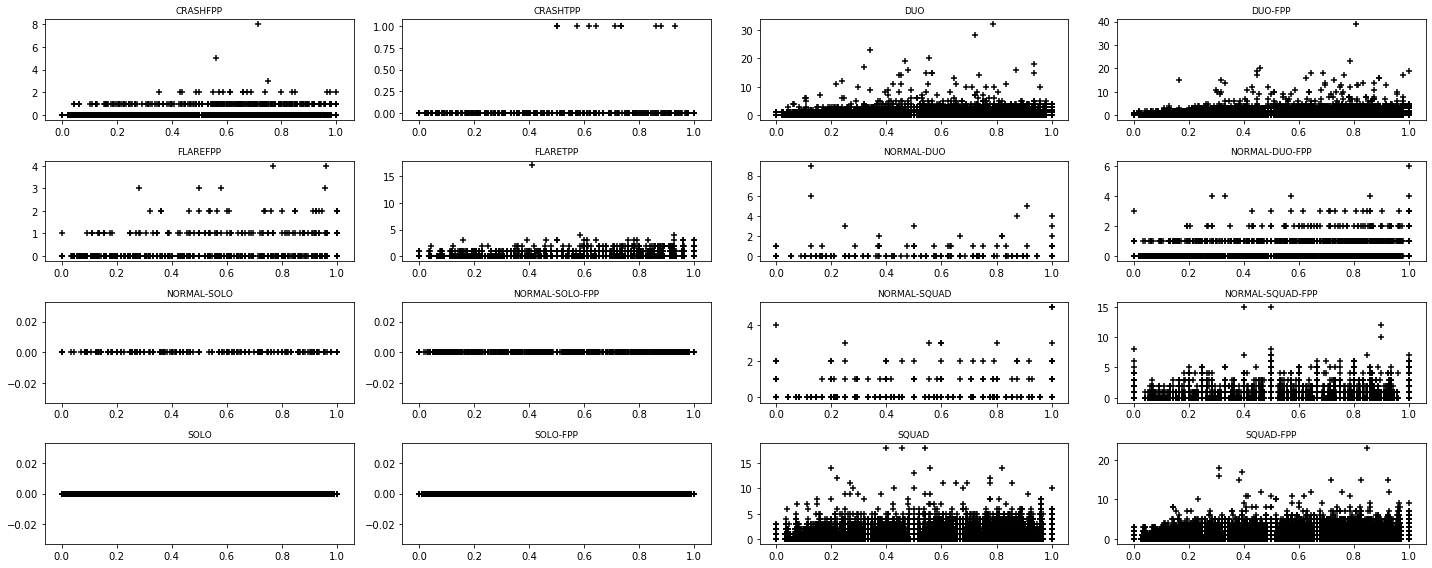

============================================================ RIDEDISTANCE ============================================================



<Figure size 432x288 with 0 Axes>

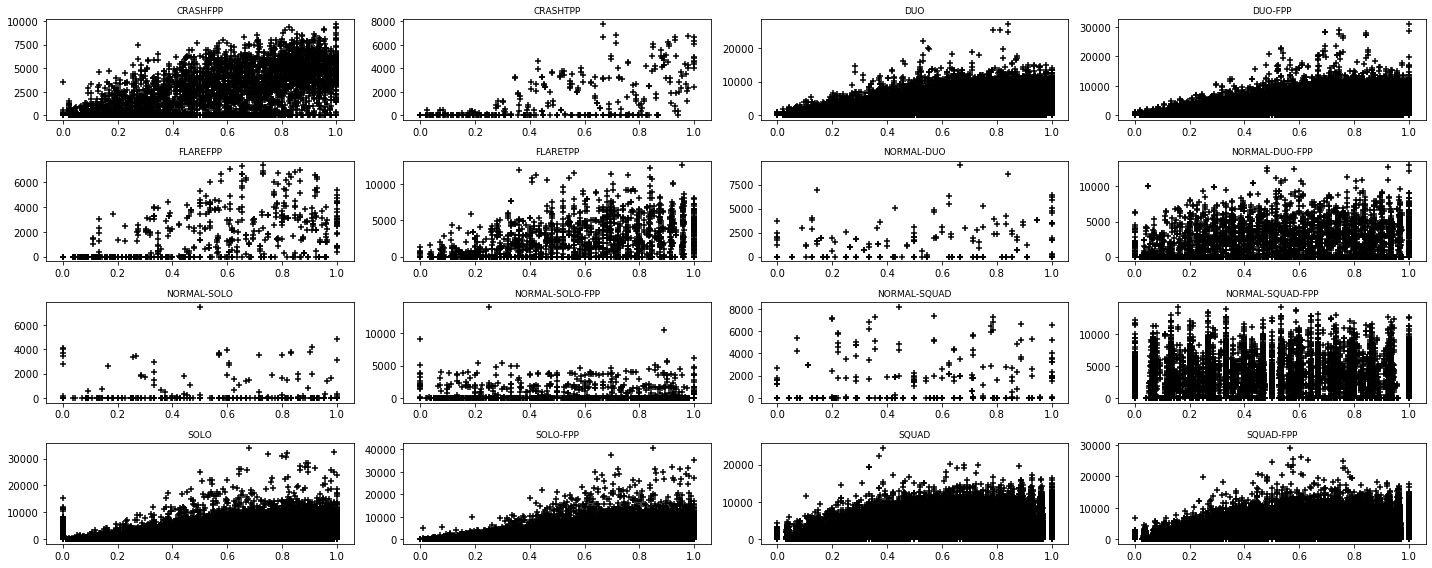

============================================================ ROADKILLS ============================================================



<Figure size 432x288 with 0 Axes>

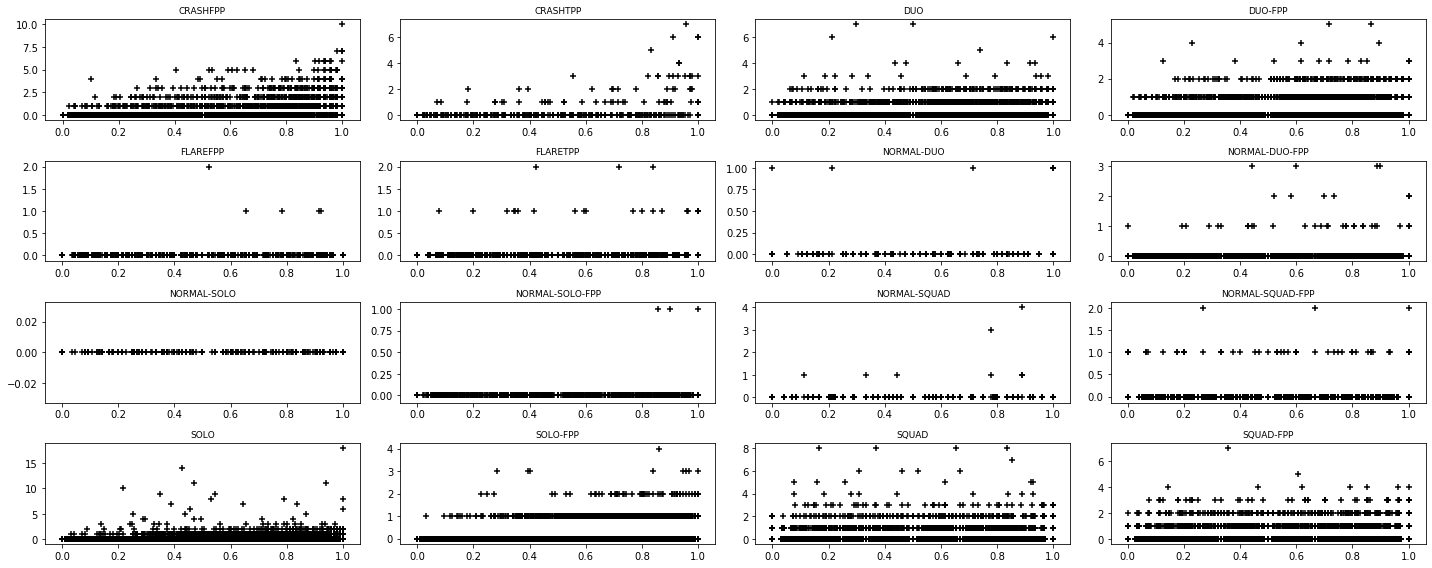

============================================================ SWIMDISTANCE ============================================================



<Figure size 432x288 with 0 Axes>

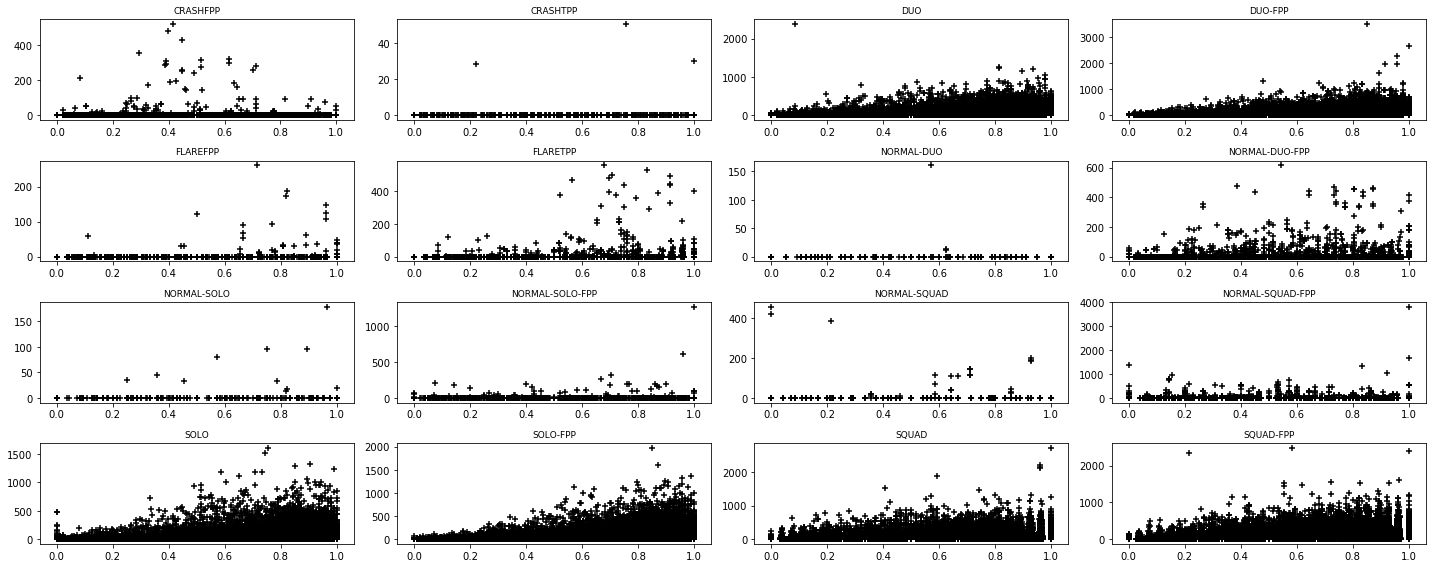

============================================================ TEAMKILLS ============================================================



<Figure size 432x288 with 0 Axes>

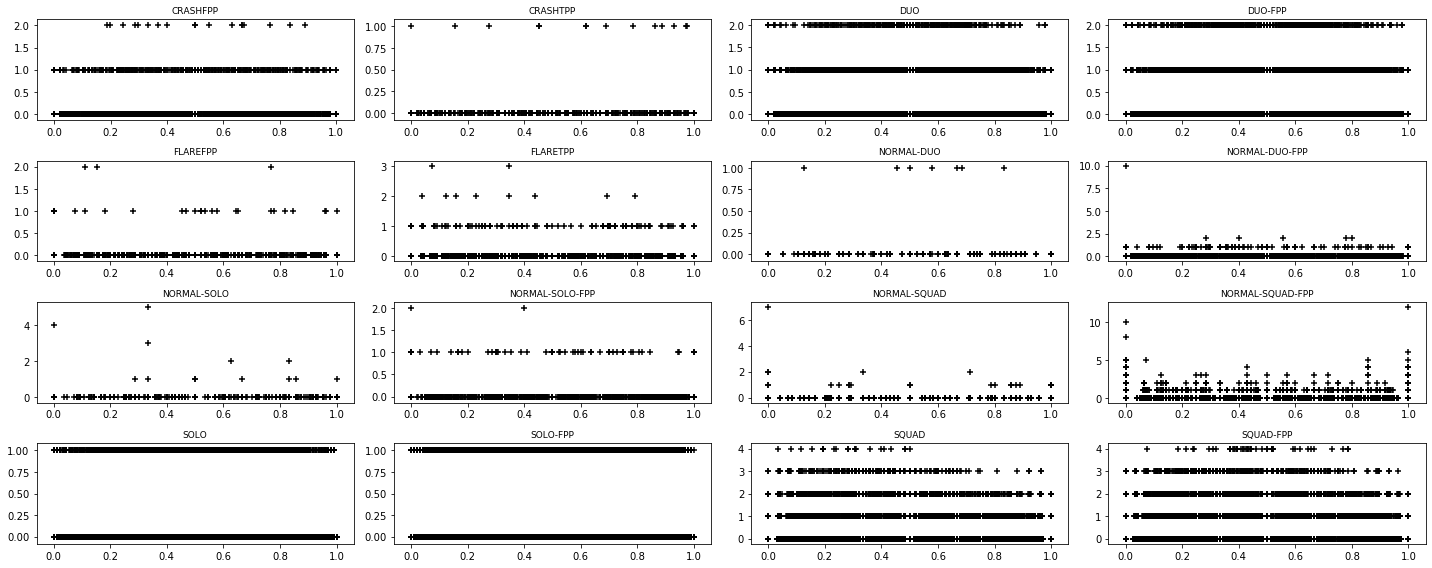

============================================================ VEHICLEDESTROYS ============================================================



<Figure size 432x288 with 0 Axes>

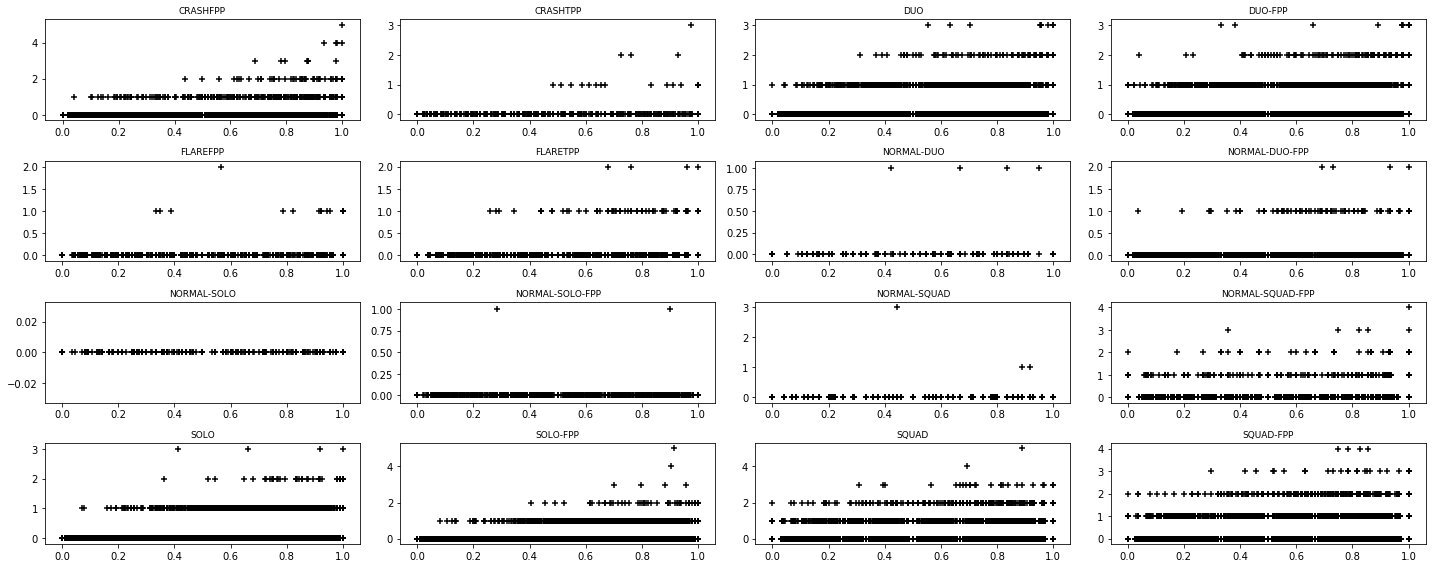

============================================================ WALKDISTANCE ============================================================



<Figure size 432x288 with 0 Axes>

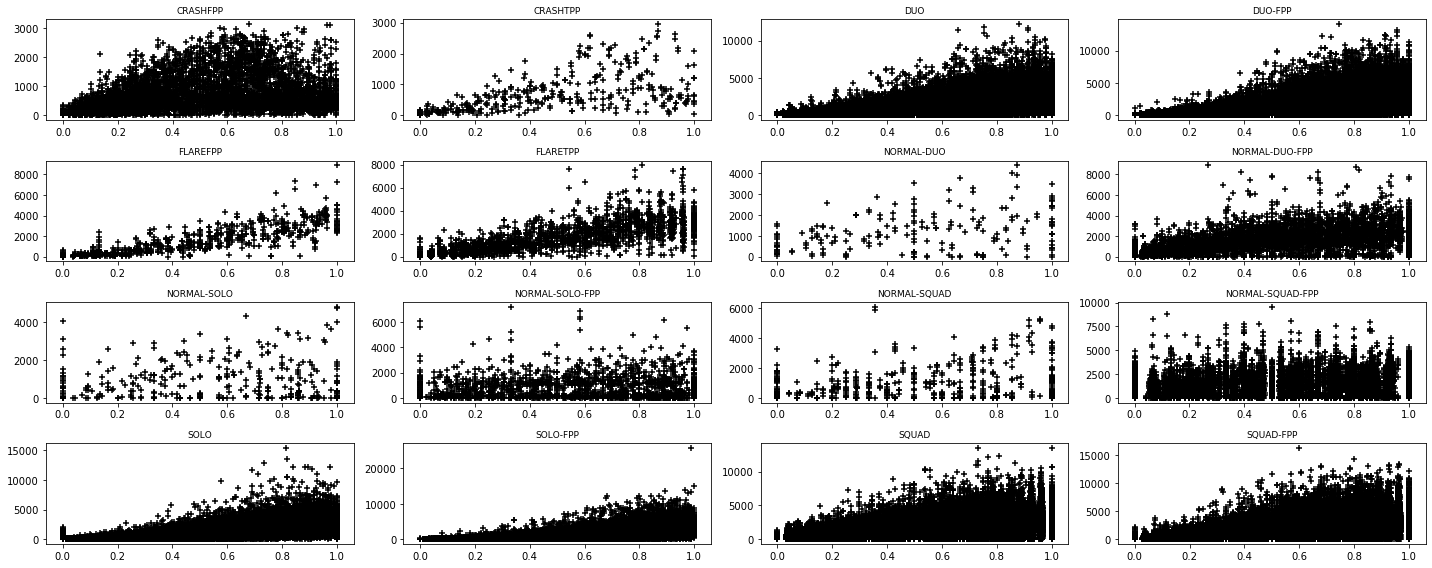

============================================================ WEAPONSACQUIRED ============================================================



<Figure size 432x288 with 0 Axes>

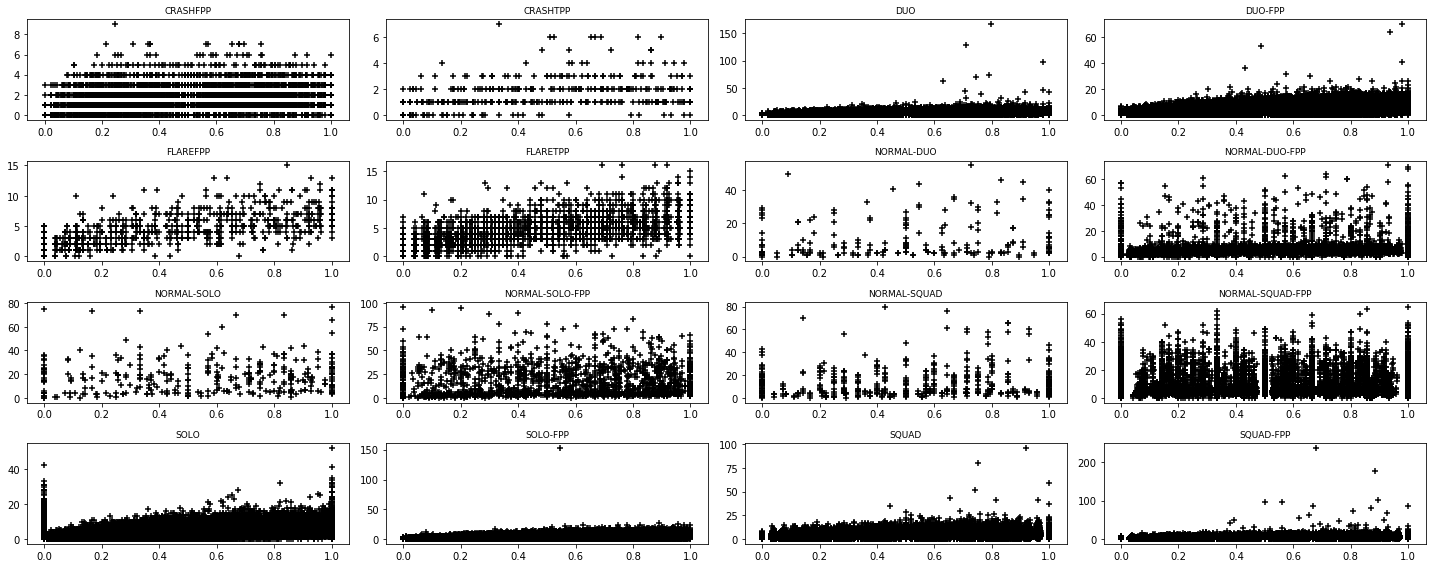

============================================================ WINPOINTS ============================================================



<Figure size 432x288 with 0 Axes>

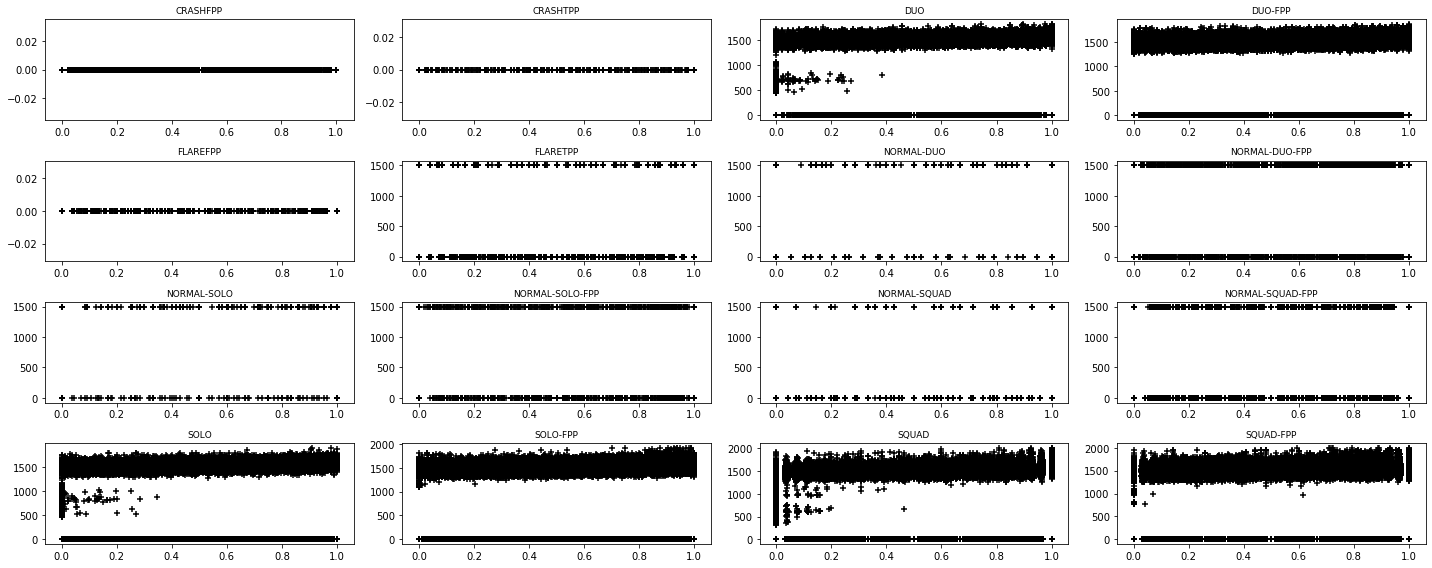

Wall time: 10min 17s


In [21]:
%%time
for feat in features:
    print("="*60+" {} ".format(feat).upper()+"="*60+"\n")
    plt.figure()
    fig, ax = plt.subplots(4,4,figsize=(20,8)) #(nrow, ncol)

    for i, mt in enumerate(mt_ls):
#         i += 1
        plt.subplot(4,4,i+1)
        plt.scatter(tr[tr['matchType']==mt]['winPlacePerc'], tr[tr['matchType']==mt][feat], marker='+', c='black')
        #plt.xlabel(feat, fontsize=9)
        #plt.xticks([1,8,15,22,29]) 
        plt.title(mt.upper(), fontsize=9)
        plt.tight_layout()

    plt.show();

<!-- ---     -->
    As seen above plots, distributions are differ by each matchType. And linearity with each features are also differ by matchType.
    We can apply this charateristics for making effective feature.
    Or we could build models by matchType. --> data can be too small for some matchType model
---

#### **Outliers**
    Tabular datasets could have some outliers.
    Considering this dataset that comes from online battle royal game, there are some data from "bad users".
    As I experienced, there are cheaters and abusers. The formers are playing this game for win or just for fun by using unauthorized programming tools. The latters are playing just for fun by trolling teammates no matter how the game goes.
    
    - As I culled the columns that might have outliers by seeing the plots, I should delve into the columns below.
    :headshotkills, damagedealt, kills, killstreaks, longestkill, rankpoints, revives, roadkills, swimdistance, teamkills, walkdistance, weaponsacquired
    
    - I suppose only a teamkills feature has a relation with the abusers.
    
#### **Handling Outlier**
    To deal with the outliers, there are some ways.
    1. One thing is just eliminate them before train the model. This is easiest way of handling outlier. However, after removing them from the dataset, if the amount of data reduced to too small, this is promblematic. And also, test dataset can also have some amount of outliers in it. Therefore, we should carefully consider this situation.
    
    2. Not removing them from the dataset. How we can handle those nuisances. Another way I have tried is to predict outliers. You could think this as an detecting cheaters and abusers. 
    So, in this case, we have to build binary classification model and the target is outlier. How to know it's outlier or not? This field is up to human.
    In this case, we have to build model in two categories; regression and classification models. For regression model, after excluding the outlier, we train and predict. For classification model, we designate outliers as binary, then we train with all the data. With threshold of some where between 90~100% of probability, if the prob pass the threshold then we designate those as outlier.
    
    3. Just train all. If dataset is too small. Or after eliminating outlier, model's performance doesn't reach the baseline performance.